In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import chi2_contingency
# from translate import Translator
from googletrans import Translator
pd.set_option('display.max_columns', None)

In [2]:
# defining translator for possible use
translator = Translator()
translator.translate('Desobeir el senyal del semŕfor', dest='en', src='ca').text

'Disobeying the semŕfor signal'

In [3]:
data_2020 = pd.read_csv('C:/Users/mauri/Downloads/2020_accidents_persones_gu_bcn.csv')
data_2021 = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/ipynb files/barcelona_data.csv')
# data_2019 = pd.read_csv('C:/Users/mauri/Downloads/2019_accidents_persones_gu_bcn_.csv')
# data_2018 = pd.read_csv('C:/Users/mauri/Downloads/2018_accidents_persones_gu_bcn_.csv')
# data_2017 = pd.read_csv('C:/Users/mauri/Downloads/2017_accidents_persones_gu_bcn_.csv')


In [4]:
#Data Dropped due to inconsistant feature type, some not existing in one dataframe
data_2020.drop(['Descripcio_tipus_dia','Dia_setmana'], axis = 1, inplace = True)
# re_indexed from csv conversion, redundant index
data_2021.drop(['Unnamed: 0'], axis =1, inplace =True)

In [5]:
# check 2020 data
data_2020.head(1)

,Numero_Expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_ Any,Mes_ any,Nom_mes,Dia_mes,Descripcio_torn,Hora_dia,Descripcio_causa_vianant,Desc_Tipus_vehicle_implicat,Descripció_sexe,Edat,Descripció_tipus_persona,Descripcio_Lloc_atropellament_vianat,Descripcio_Motiu_desplaĂ§ament_vianant,Descripcio_Motiu_desplaĂ§ament_conductor,Descripcio_victimitzacio,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2020S000001,7,Horta-Guinardó,36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,2020,1,Gener,1,Nit,0,Desconegut,Turisme,Dona,29,Conductor,Desconegut ...,Desconegut,Es desconeix,Il.lčs,430501.45,4586751.53,2.167116,41.427474


In [6]:
#check 2020 data

In [7]:
data_2021.head(1)

,file number,district code,district name,neighborhood code,neighborhood name,street code,street name,postal no.,i describe the day of the week,nk year,month/year,month name,day month,shift description,time of day,i describe a pedestrian cause,desc type of vehicle involved,description of sex,how old are you?,description of the type of person,i describe the place of the road run over,descriptio reason for commuting,i describe the reason for the displacement of the driver,victimization description,utm x ed50 coordinate,utm and ed50 coordinate,length wgs84,wgs84 latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541


In [8]:
#for data with Catalan columns, 2020 Data
old_column_name = ['Numero_Expedient',
 'Codi_districte',
 'Nom_districte',
 'Codi_barri',
 'Nom_barri',
 'Codi_carrer',
 'Nom_carrer',
 'Num_postal',
 'Descripcio_dia_setmana',
 'NK_ Any',
 'Mes_ any',
 'Nom_mes',
 'Dia_mes',
 'Descripcio_torn',
 'Hora_dia',
 'Descripcio_causa_vianant',
 'Desc_Tipus_vehicle_implicat',
 'Descripció_sexe',
 'Edat',
 'Descripció_tipus_persona',
 'Descripcio_Lloc_atropellament_vianat',
 'Descripcio_Motiu_desplaĂ§ament_vianant',
 'Descripcio_Motiu_desplaĂ§ament_conductor',
 'Descripcio_victimitzacio',
 'Coordenada_UTM_X',
 'Coordenada_UTM_Y',
 'Longitud',
 'Latitud'
]

new_columns_name = ['file number',
'district code',
 'district name',
 'neighborhood code',
 'neighborhood name',
 'street code',
 'street name',
 'postal no.',
 'day of week',
 'year',
 'month id',
 'month name',
 'day of month',
 'type of shift',
 'time of day',
 'description of cause by pedestrian',
 'vehicle type involved',
 'gender',
 'age',
 'type of person involved',
 'pedestrian hit and run location',
 'reason for travel pedestrian',
 'reason for travel driver',
 'accident_result',
 'x coordinate utm format',
 'y coordinate utm format',
 'longitude',
 'latitude'
]

new_column_dict_13 = {}

for i,j in zip(old_column_name,new_columns_name):
    new_column_dict_13[i] = j

In [9]:
# for dataframe with 'english' columns, 2021 Data
old_column_name = ['file number',
 'district code',
 'district name',
 'neighborhood code',
 'neighborhood name',
 'street code',
 'street name',
 'postal no.',
 'i describe the day of the week',
 'nk  year',
 'month/year',
 'month name',
 'day month',
 'shift description',
 'time of day',
 'i describe a pedestrian cause',
 'desc type of vehicle involved',
 'description of sex',
 'how old are you?',
 'description of the type of person',
 'i describe the place of the road run over',
 'descriptio reason for commuting',
 'i describe the reason for the displacement of the driver',
 'victimization description',
 'utm x ed50 coordinate',
 'utm and ed50 coordinate',
 'length wgs84',
 'wgs84 latitude'
]

new_columns_name = ['file number',
'district code',
 'district name',
 'neighborhood code',
 'neighborhood name',
 'street code',
 'street name',
 'postal no.',
 'day of week',
 'year',
 'month id',
 'month name',
 'day of month',
 'type of shift',
 'time of day',
 'description of cause by pedestrian',
 'vehicle type involved',
 'gender',
 'age',
 'type of person involved',
 'pedestrian hit and run location',
 'reason for travel pedestrian',
 'reason for travel driver',
 'accident_result',
 'x coordinate utm format',
 'y coordinate utm format',
 'longitude',
 'latitude'
]

new_column_dict_8 = {}

for i,j in zip(old_column_name,new_columns_name):
    new_column_dict_8[i] = j

In [10]:
# new column names for 2020 data
data_2020.columns = data_2020.columns.map(new_column_dict_13)
# new column names for 2021 data
data_2021.columns = data_2021.columns.map(new_column_dict_8)

In [11]:
data_2021.head(1)

,file number,district code,district name,neighborhood code,neighborhood name,street code,street name,postal no.,day of week,year,month id,month name,day of month,type of shift,time of day,description of cause by pedestrian,vehicle type involved,gender,age,type of person involved,pedestrian hit and run location,reason for travel pedestrian,reason for travel driver,accident_result,x coordinate utm format,y coordinate utm format,longitude,latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541


In [12]:
data_2020.head(1)

,file number,district code,district name,neighborhood code,neighborhood name,street code,street name,postal no.,day of week,year,month id,month name,day of month,type of shift,time of day,description of cause by pedestrian,vehicle type involved,gender,age,type of person involved,pedestrian hit and run location,reason for travel pedestrian,reason for travel driver,accident_result,x coordinate utm format,y coordinate utm format,longitude,latitude
0,2020S000001,7,Horta-Guinardó,36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,2020,1,Gener,1,Nit,0,Desconegut,Turisme,Dona,29,Conductor,Desconegut ...,Desconegut,Es desconeix,Il.lčs,430501.45,4586751.53,2.167116,41.427474


In [13]:
data_2021['age'].unique()

array(['8', '58', '52', '47', '4', '90', '31', '54', '45', '42', '53',
       '62', '80', '60', '25', '28', '51', '56', '22', '63', '35', '40',
       '73', '17', '78', '24', '30', '71', '86', '97', '44', '43', '36',
       '57', '75', '84', '69', '20', '19', '85', '46', '76', '65', '6',
       '39', '41', '91', '34', '48', '29', '59', '33', '87', '3', '10',
       '74', '61', '26', '72', '38', '21', '49', '32', '66', '81', '5',
       '18', '13', '27', '11', '37', '50', '23', '82', 'Desconegut', '70',
       '14', '67', '55', '16', '12', '2', '77', '7', '68', '64', '93',
       '79', '15', '0', '89', '83', '1', '9', '92', '96', '88', '95',
       '94'], dtype=object)

In [14]:
# function to remove "Desconegut" from the data
def convert_desconegut(x):
    if x == 'Desconegut':
        return np.nan
    else:
        return x

data_2021['age'] = data_2021['age'].apply(convert_desconegut)

data_2021['age'].unique()

array(['8', '58', '52', '47', '4', '90', '31', '54', '45', '42', '53',
       '62', '80', '60', '25', '28', '51', '56', '22', '63', '35', '40',
       '73', '17', '78', '24', '30', '71', '86', '97', '44', '43', '36',
       '57', '75', '84', '69', '20', '19', '85', '46', '76', '65', '6',
       '39', '41', '91', '34', '48', '29', '59', '33', '87', '3', '10',
       '74', '61', '26', '72', '38', '21', '49', '32', '66', '81', '5',
       '18', '13', '27', '11', '37', '50', '23', '82', nan, '70', '14',
       '67', '55', '16', '12', '2', '77', '7', '68', '64', '93', '79',
       '15', '0', '89', '83', '1', '9', '92', '96', '88', '95', '94'],
      dtype=object)

In [15]:
# Inquire on why, when i applied the function, each number was returned as a int
data_2021['age'].value_counts()

27    265
25    263
30    258
26    246
28    246
     ... 
93      3
96      2
97      1
95      1
94      1
Name: age, Length: 98, dtype: int64

In [16]:
#Convert everything into a float, to match 2020 data
data_2021['age'] = data_2021['age'].astype('float')

In [17]:
# lets clean up the -1 value, its not a real age

def clean_negative(x):
    if x == -1:
        return np.nan
    else:
        return x
    
data_2020['age'] = data_2020['age'].apply(clean_negative)

In [18]:
data_2020['age'].value_counts().dtype

dtype('int64')

In [19]:
data_2020.head(1)

,file number,district code,district name,neighborhood code,neighborhood name,street code,street name,postal no.,day of week,year,month id,month name,day of month,type of shift,time of day,description of cause by pedestrian,vehicle type involved,gender,age,type of person involved,pedestrian hit and run location,reason for travel pedestrian,reason for travel driver,accident_result,x coordinate utm format,y coordinate utm format,longitude,latitude
0,2020S000001,7,Horta-Guinardó,36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,2020,1,Gener,1,Nit,0,Desconegut,Turisme,Dona,29.0,Conductor,Desconegut ...,Desconegut,Es desconeix,Il.lčs,430501.45,4586751.53,2.167116,41.427474


In [20]:
data_2021.head(1)

,file number,district code,district name,neighborhood code,neighborhood name,street code,street name,postal no.,day of week,year,month id,month name,day of month,type of shift,time of day,description of cause by pedestrian,vehicle type involved,gender,age,type of person involved,pedestrian hit and run location,reason for travel pedestrian,reason for travel driver,accident_result,x coordinate utm format,y coordinate utm format,longitude,latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8.0,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541


In [21]:
# horizonatally concat our data
df_to_concat = [data_2021,data_2020]

data = pd.concat(df_to_concat).reset_index(drop=True)

In [22]:
#standardizing header names
underscore = lambda x : x.replace(' ','_')
data.columns = data.columns.map(underscore)

In [23]:
data.head(1)

,file_number,district_code,district_name,neighborhood_code,neighborhood_name,street_code,street_name,postal_no.,day_of_week,year,month_id,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_pedestrian,reason_for_travel_driver,accident_result,x_coordinate_utm_format,y_coordinate_utm_format,longitude,latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8.0,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541


In [24]:
# Checking to see what kind of data we have
print("Numerical Columns: " + str(data.select_dtypes('number').shape[1]))
print("Categorical Columns: " + str(data.select_dtypes('object').shape[1]))

Numerical Columns: 12
Categorical Columns: 16


In [25]:
#number data types
data.select_dtypes('number').nunique()

district_code                11
neighborhood_code            74
street_code                1343
year                          2
month_id                     12
day_of_month                 31
time_of_day                  24
age                          99
x_coordinate_utm_format    7926
y_coordinate_utm_format    7913
longitude                  9355
latitude                   7963
dtype: int64

In [26]:
# object data types
data.select_dtypes('object').nunique()

file_number                           13258
district_name                            14
neighborhood_name                        79
street_name                            1389
postal_no.                             2475
day_of_week                               7
month_name                               12
type_of_shift                             3
description_of_cause_by_pedestrian        8
vehicle_type_involved                    27
gender                                    3
type_of_person_involved                   4
pedestrian_hit_and_run_location           9
reason_for_travel_pedestrian             13
reason_for_travel_driver                 25
accident_result                          11
dtype: int64

In [27]:
# Converting columns to data type, as their numerical status  is nothing more than a label, i.e you can't find the average of a district code.
# for the sake of the bulk of my analysis, we will also convert time of day to an object as well

convert_to_object = ['district_code','street_code','year','day_of_month','time_of_day']

for col_name in convert_to_object:
    data[col_name] = data[col_name].astype('object')

## Lets remove some columns that are redudant in terms of business purposes

In [28]:
# List of numerical columns to drop (neigh. code, simply because it appears that one code can represent 2 different neighboordhood, perhaps in close proximity) 
# Also gonna drop the x/y coordinate in utm format, it seems redundant as I already have lat and long data
data.drop(['neighborhood_code','month_id','neighborhood_code','x_coordinate_utm_format','y_coordinate_utm_format'],axis = 1, inplace = True)
# List of categorical columns to drop
data.drop(['file_number','street_name','postal_no.'], axis = 1, inplace = True)

# Final Data Types

In [29]:
data.select_dtypes('number').nunique()

age            99
longitude    9355
latitude     7963
dtype: int64

In [30]:
data.select_dtypes('object').nunique()

district_code                           11
district_name                           14
neighborhood_name                       79
street_code                           1343
day_of_week                              7
year                                     2
month_name                              12
day_of_month                            31
type_of_shift                            3
time_of_day                             24
description_of_cause_by_pedestrian       8
vehicle_type_involved                   27
gender                                   3
type_of_person_involved                  4
pedestrian_hit_and_run_location          9
reason_for_travel_pedestrian            13
reason_for_travel_driver                25
accident_result                         11
dtype: int64

# Lets replace nan values, if any

In [31]:
data.isna().sum()

district_code                           0
district_name                           0
neighborhood_name                       0
street_code                             0
day_of_week                             0
year                                    0
month_name                              0
day_of_month                            0
type_of_shift                           0
time_of_day                             0
description_of_cause_by_pedestrian      0
vehicle_type_involved                   0
gender                                  0
age                                   757
type_of_person_involved                 0
pedestrian_hit_and_run_location         0
reason_for_travel_pedestrian            0
reason_for_travel_driver                0
accident_result                         0
longitude                              29
latitude                               29
dtype: int64

In [32]:
# Lets replace nan in age columns, with the average age :D

data['age'] = data['age'].fillna(data['age'].mean())
data['age'].isna().sum()

0

### Dropping Columns 1

In [33]:
#Lets keep track of how many columns we dropped with a list
total_columns_dropped = []

b_drop_na = data.shape[0]

data = data.dropna()

a_drop_na = data.shape[0]

drop_na = b_drop_na - a_drop_na

total_columns_dropped.append(drop_na)

## Lets check if we have any duplicates


In [34]:
# And there are none!
data.duplicated().value_counts()

False    22635
dtype: int64

# Final Review of Datatypes and NA count

In [35]:
data.select_dtypes('number').nunique()

age           100
longitude    9355
latitude     7963
dtype: int64

In [36]:
data.select_dtypes('object').nunique()

district_code                           11
district_name                           14
neighborhood_name                       79
street_code                           1343
day_of_week                              7
year                                     2
month_name                              12
day_of_month                            31
type_of_shift                            3
time_of_day                             24
description_of_cause_by_pedestrian       8
vehicle_type_involved                   27
gender                                   3
type_of_person_involved                  4
pedestrian_hit_and_run_location          9
reason_for_travel_pedestrian            13
reason_for_travel_driver                25
accident_result                         11
dtype: int64

In [37]:
data.isna().sum()

district_code                         0
district_name                         0
neighborhood_name                     0
street_code                           0
day_of_week                           0
year                                  0
month_name                            0
day_of_month                          0
type_of_shift                         0
time_of_day                           0
description_of_cause_by_pedestrian    0
vehicle_type_involved                 0
gender                                0
age                                   0
type_of_person_involved               0
pedestrian_hit_and_run_location       0
reason_for_travel_pedestrian          0
reason_for_travel_driver              0
accident_result                       0
longitude                             0
latitude                              0
dtype: int64

# Because we are working with a dataset in Catalan, i decided to change the data to English
# Limited by the googletrans and translate api, i did this by hand, by means of if/else logic and dictionary mapping

## day of week cleaning

In [38]:
data['day_of_week'].unique()

array(['Dimarts', 'Divendres', 'Dilluns', 'Dissabte', 'Diumenge',
       'Dijous', 'Dimecres'], dtype=object)

In [39]:
def clean_day(x):
    if x == 'Dimarts':
        return 'Tuesday'
    if x == 'Divendres':
        return 'Friday'
    if x == 'Dilluns':
        return 'Monday'
    if x == 'Dissabte':
        return 'Saturday'
    if x == 'Diumenge':
        return 'Sunday'
    if x == 'Dijous':
        return 'Thursday'
    if x == 'Dimecres':
        return 'Wednesday'

In [40]:
data['day_of_week'] = list(map(clean_day,data['day_of_week']))

In [41]:
data['day_of_week'].value_counts()

Thursday     3929
Friday       3763
Wednesday    3591
Tuesday      3363
Monday       3348
Saturday     2653
Sunday       1988
Name: day_of_week, dtype: int64

## month name cleaning

In [42]:
data['month_name'].value_counts()

Febrer      2356
Gener       2284
Juliol      2275
Desembre    2172
Octubre     2152
Setembre    2123
Novembre    2022
Juny        1912
Març        1680
Agost       1457
Maig        1357
Abril        845
Name: month_name, dtype: int64

In [43]:
def clean_month(x):
    if x == 'Juny':
        return 'June'
    if x == 'Novembre':
        return 'November'
    if x == 'Juliol':
        return 'July'
    if x == 'Desembre':
        return 'December'
    if x == 'Octubre':
        return 'October'
    if x == 'Maig':
        return 'May'
    if x == 'Setembre':
        return 'September'
    if x == 'Març':
        return 'March'
    if x == 'Abril':
        return 'April'
    if x == 'Febrer':
        return 'February'
    if x == 'Gener':
        return 'January'
    if x == 'Agost':
        return 'August'

In [44]:
data['month_name'] = data['month_name'].apply(clean_month)

In [45]:
data['month_name'].value_counts()

February     2356
January      2284
July         2275
December     2172
October      2152
September    2123
November     2022
June         1912
March        1680
August       1457
May          1357
April         845
Name: month_name, dtype: int64

## type of shift cleaning

In [46]:
data['type_of_shift'].unique()

array(['Tarda', 'Matí', 'Nit'], dtype=object)

In [47]:
def clean_shift(x):
    if x == 'Tarda':
        return 'Afternoon'
    if x == 'Matí':
        return 'Morning'
    if x == 'Nit':
        return 'Night'

In [48]:
data['type_of_shift'] = data['type_of_shift'].apply(clean_shift)
data['type_of_shift'].value_counts()

Afternoon    11912
Morning       8515
Night         2208
Name: type_of_shift, dtype: int64

## description of cause by pedestrian cleaning

In [49]:
list(data['description_of_cause_by_pedestrian'].value_counts().index)

['Desconegut',
 'No és causa del  vianant',
 'Creuar per fora pas de vianants',
 'Desobeir el senyal del semŕfor',
 'Desobeir el senyal del semàfor',
 'Altres',
 'Transitar a peu per la calçada',
 'Desobeir altres senyals']

In [50]:
# We will consider unknowns and other as the same in this dictionary: unknown
cause_ped_ca = ['Desconegut',
 'No és causa del  vianant',
 'Creuar per fora pas de vianants',
 'Desobeir el senyal del semŕfor',
 'Desobeir el senyal del semàfor',
 'Altres',
 'Transitar a peu per la calçada',
 'Desobeir altres senyals'
]

cause_ped_en = ['unknown',
 'In passage regulated by traffic lights',
 'Out of step',
 'On the sidewalk',
 'Unregulated step',
 'unknown',
 'In pedestrian zone',
 'Unmarked crossing'
]

cause_ped_dict = {}

for i,j in zip(cause_ped_ca,cause_ped_en):
    cause_ped_dict[i] = j

In [51]:
data['description_of_cause_by_pedestrian'] = data['description_of_cause_by_pedestrian'].map(cause_ped_dict)

In [52]:
data['description_of_cause_by_pedestrian'].value_counts()

unknown                                   13227
In passage regulated by traffic lights     8224
Out of step                                 448
On the sidewalk                             346
Unregulated step                            240
In pedestrian zone                          144
Unmarked crossing                             6
Name: description_of_cause_by_pedestrian, dtype: int64

## vehicle type involved cleaning

In [53]:
list(data['vehicle_type_involved'].value_counts().index)

['Motocicleta',
 'Turisme',
 'Bicicleta',
 'Veh. mobilitat personal amb motor',
 'Furgoneta',
 'Ciclomotor',
 'Autobús',
 'Autobús articulat',
 'Taxi',
 'Camió rígid <= 3,5 tones',
 'Camió rígid > 3,5 tones',
 'Tot terreny',
 'Tractor camió',
 'Altres vehicles amb motor',
 'Veh. mobilitat personal sense motor',
 'Desconegut',
 'Tren o tramvia',
 "Maquinŕria d'obres i serveis",
 'Ambulància',
 'Quadricicle < 75 cc',
 'Altres vehicles sense motor',
 'Autocaravana',
 'Ambulŕncia',
 'Pick-up',
 'Quadricicle > 75 cc',
 "Maquinària d'obres i serveis",
 'Microbús <= 17']

In [54]:
vehicles_catalan = ['Motocicleta',
 'Turisme',
 'Bicicleta',
 'Veh. mobilitat personal amb motor',
 'Furgoneta',
 'Ciclomotor',
 'Autobús',
 'Autobús articulat',
 'Taxi',
 'Camió rígid <= 3,5 tones',
 'Camió rígid > 3,5 tones',
 'Tot terreny',
 'Tractor camió',
 'Altres vehicles amb motor',
 'Veh. mobilitat personal sense motor',
 'Desconegut',
 'Tren o tramvia',
 "Maquinŕria d'obres i serveis",
 'Ambulància',
 'Quadricicle < 75 cc',
 'Altres vehicles sense motor',
 'Autocaravana',
 'Ambulŕncia',
 'Pick-up',
 'Quadricicle > 75 cc',
 "Maquinària d'obres i serveis",
 'Microbús <= 17'
]
vehicles_english = ['Motorcycle',
  'Tourism',
  'Bicycle',
  'See. personal mobility with motor',
  'Van',
  'Moped',
  'Bus',
  'Articulated bus',
  'Taxi',
  'Rigid truck <= 3.5 tonnes',
  'Rigid truck > 3.5 tonnes',
  'All Terrain',
  'Tractor Truck',
  'Other motor vehicles',
  'personal mobility without motor',
  'unknown',
  'Train or tram',
  "Construction machinery and services",
  'Ambulance',
  'Quadricycle < 75 cc',
  'Other vehicles without motor',
  'Motorhome',
  'Ambulance',
  'Pick-up',
  'Quadricycle > 75 cc',
  "Works and services machinery",
  'Minibus <= 17'
]

vehicle_dict = {}

for i,j in zip(vehicles_catalan,vehicles_english):
    vehicle_dict[i] = j

In [55]:
data['vehicle_type_involved'] = data['vehicle_type_involved'].map(vehicle_dict)

In [56]:
data['vehicle_type_involved'].value_counts()

Motorcycle                             8310
Tourism                                6772
Bicycle                                1450
See. personal mobility with motor      1304
Van                                    1210
Moped                                  1150
Bus                                     837
Articulated bus                         473
Taxi                                    386
Rigid truck <= 3.5 tonnes               177
Rigid truck > 3.5 tonnes                170
All Terrain                             145
Tractor Truck                            64
Other motor vehicles                     50
personal mobility without motor          36
unknown                                  27
Train or tram                            20
Ambulance                                15
Construction machinery and services      14
Quadricycle < 75 cc                       8
Other vehicles without motor              5
Motorhome                                 4
Pick-up                         

## gender cleaning

In [57]:
list(data['gender'].value_counts().index)

['Home', 'Dona', 'Desconegut']

In [58]:
def clean_gender(x):
    if x == 'Home':
        return 'M'
    if x == 'Dona':
        return 'F'
    if x == 'Desconegut':
        return 'U'

In [59]:
data['gender'] = data['gender'].apply(clean_gender)

In [60]:
data['gender'].value_counts()

M    14329
F     7622
U      684
Name: gender, dtype: int64

## type of person involved

In [61]:
list(data['type_of_person_involved'].value_counts().index)

['Conductor', 'Passatger', 'Vianant', 'Desconegut']

In [62]:
def clean_injured(x):
    if x == 'Conductor':
        return 'Driver'
    if x == 'Passatger':
        return 'Passenger'
    if x == 'Vianant':
        return 'Pedestrian'
    if x == 'Desconegut':
        return 'unknown'

In [63]:
data['type_of_person_involved'] = data['type_of_person_involved'].apply(clean_injured)

In [64]:
data['type_of_person_involved'].value_counts()

Driver        17829
Passenger      3090
Pedestrian     1712
unknown           4
Name: type_of_person_involved, dtype: int64

## reason for travel pedestrian cleaning

In [65]:
list(data['reason_for_travel_pedestrian'].value_counts().index)

['Desconegut',
 'Oci i entreteniment',
 'Es desconeix',
 'Altres activitats',
 'In itinere',
 'En missió',
 "Estudiant cap a centre d'estudis",
 "Servei de neteja, recollida d'escombraries",
 'Transport de menors al colˇlegi',
 'Bombers, policia, ambulŕncia',
 'Transport de menors al col·legi',
 'Bombers, policia, ambulància',
 'Servei de manteniment viari']

In [66]:
commute_ca = ['Desconegut',
 'Oci i entreteniment',
 'Es desconeix',
 'Altres activitats',
 'In itinere',
 'En missió',
 "Estudiant cap a centre d'estudis",
 "Servei de neteja, recollida d'escombraries",
 'Transport de menors al colˇlegi',
 'Bombers, policia, ambulŕncia',
 'Transport de menors al col·legi',
 'Bombers, policia, ambulància',
 'Servei de manteniment viari'
]
commute_en = ['unknown',
  'Leisure and entertainment',
  'unknown',
  'Other activities',
  'In tour',
  'On a mission',
  "Student towards study center",
  "Cleaning service, garbage collection",
  'Transportation of minors to school',
  'Fire, police, ambulance',
  'Transportation of minors to school',
  'Fire, police, ambulance',
  'Road maintenance service'
]

commute_dict = {}

for i,j in zip(commute_ca,commute_en):
    commute_dict[i] = j

In [67]:
data['reason_for_travel_pedestrian'] = data['reason_for_travel_pedestrian'].map(commute_dict)

In [68]:
data['reason_for_travel_pedestrian'].value_counts()

unknown                                 21977
Leisure and entertainment                 358
Other activities                          145
In tour                                    79
On a mission                               44
Student towards study center               22
Cleaning service, garbage collection        3
Transportation of minors to school          3
Fire, police, ambulance                     3
Road maintenance service                    1
Name: reason_for_travel_pedestrian, dtype: int64

## pedestrian hit and run location description

In [69]:
data['pedestrian_hit_and_run_location'].value_counts()

Desconegut                                                                                                                                                20017
En pas regulat per semŕfor                                                                                                                                  653
Fora del pas                                                                                                                                                622
En pas regulat per semàfor                                                                                                                                  429
A la vorera / Andana                                                                                                                                        308
En pas sense regular                                                                                                                                        291
Altres                                  

In [70]:
# Lower case 
strip_1 = lambda x: x.strip()

In [71]:
data['pedestrian_hit_and_run_location'] = data['pedestrian_hit_and_run_location'].apply(strip_1)

In [72]:
list(data['pedestrian_hit_and_run_location'].value_counts().index)

['Desconegut',
 'En pas regulat per semŕfor',
 'Fora del pas',
 'En pas regulat per semàfor',
 'A la vorera / Andana',
 'En pas sense regular',
 'Altres',
 'En zona peatonal',
 'En pas sense senyalitzar']

In [73]:
loc_ca = ['Desconegut',
 'En pas regulat per semŕfor',
 'Fora del pas',
 'En pas regulat per semàfor',
 'A la vorera / Andana',
 'En pas sense regular',
 'Altres',
 'En zona peatonal',
 'En pas sense senyalitzar'
]

loc_en = ['unknown',
  'In passage regulated by traffic lights',
  'Out of step',
  'In passage regulated by traffic lights',
  'On the sidewalk',
  'Unregulated step',
  'unknown',
  'In pedestrian zone',
  'Unmarked crossing'
]

loc_dict = {}

for i,j in zip(loc_ca,loc_en):
    loc_dict[i] = j

In [74]:
data['pedestrian_hit_and_run_location'] = data['pedestrian_hit_and_run_location'].map(loc_dict)

In [75]:
data['pedestrian_hit_and_run_location'].value_counts()

unknown                                   20169
In passage regulated by traffic lights     1082
Out of step                                 622
On the sidewalk                             308
Unregulated step                            291
In pedestrian zone                          127
Unmarked crossing                            36
Name: pedestrian_hit_and_run_location, dtype: int64

## reason for travel driver cleaning

In [76]:
list(data['reason_for_travel_driver'].value_counts().index)

['Es desconeix',
 'Desconegut',
 'Oci i entreteniment',
 'In itínere',
 'En missió',
 'Altres activitats',
 'Taxi',
 'Bus urbŕ',
 'Transport professional de mercaderies',
 'Bombers, policia, ambulŕncia',
 "Servei de neteja o recollida d'escombraries",
 'Bus de línia regular',
 'Bombers, policia, ambulància',
 "Estudiant cap a centre d'estudis",
 'Activitat esportiva particular',
 'Bus urbà',
 "Servei d'auxili en carretera",
 'Bus de línia discrecional',
 "Transport de menors a l'escola",
 "En prŕctiques d'autoescola",
 "En pràctiques d'autoescola",
 'Servei de manteniment viari',
 'Bus escolar',
 'Anada/tornada de ponts, festius, vacances',
 'Bus en transport de menors']

In [77]:
driver_moti_ca = ['Es desconeix',
 'Desconegut',
 'Oci i entreteniment',
 'In itínere',
 'En missió',
 'Altres activitats',
 'Taxi',
 'Bus urbŕ',
 'Transport professional de mercaderies',
 'Bombers, policia, ambulŕncia',
 "Servei de neteja o recollida d'escombraries",
 'Bus de línia regular',
 'Bombers, policia, ambulància',
 "Estudiant cap a centre d'estudis",
 'Activitat esportiva particular',
 'Bus urbà',
 "Servei d'auxili en carretera",
 'Bus de línia discrecional',
 "Transport de menors a l'escola",
 "En prŕctiques d'autoescola",
 "En pràctiques d'autoescola",
 'Servei de manteniment viari',
 'Bus escolar',
 'Anada/tornada de ponts, festius, vacances',
 'Bus en transport de menors'
]
driver_moti_en = ['unknown',
  'unknown',
  'Leisure and entertainment',
  'On tour',
  'On a mission',
  'Other activities',
  'Taxi',
  'City bus',
  'Professional transport of goods',
  'Fire, police, ambulance',
  "Cleaning or garbage collection service",
  'Regular bus line',
  'Fire, police, ambulance',
  "Student towards study center",
  'Private sports activity',
  'City bus',
  "Roadside assistance service",
  'Discretionary line bus',
  "Transportation of minors to school",
  "Driving school practices",
  "Driving school practice",
  'Road maintenance service',
  'School Bus',
  'Going/returning bridges, holidays, vacations',
  'Bus transporting minors'
]

driver_dict = {}

for i,j in zip(driver_moti_ca,driver_moti_en):
    driver_dict[i] = j

In [78]:
data['reason_for_travel_driver'] = data['reason_for_travel_driver'].map(driver_dict)

In [79]:
data['reason_for_travel_driver'].value_counts()

unknown                                         12049
Leisure and entertainment                        3879
On tour                                          2721
On a mission                                     1549
Other activities                                 1197
Taxi                                              411
City bus                                          305
Professional transport of goods                   217
Fire, police, ambulance                           118
Cleaning or garbage collection service             55
Regular bus line                                   49
Student towards study center                       34
Private sports activity                            16
Roadside assistance service                         6
Discretionary line bus                              6
Transportation of minors to school                  6
Driving school practices                            5
Driving school practice                             4
Road maintenance service    

## description of the result of the victims cleaning

In [80]:
list(data['accident_result'].value_counts().index)

['Ferit lleu: Hospitalització fins a 24h',
 'Il.lčs',
 "Ferit lleu: Amb assistència sanitària en lloc d'accident",
 "Ferit lleu: Amb assistčncia sanitŕria en lloc d'accident",
 'Desconegut',
 'Ferit lleu: Rebutja assistència sanitària',
 'Ferit lleu: Rebutja assistčncia sanitŕria',
 'Ferit greu: hospitalització superior a 24h',
 'Mort (dins 24h posteriors accident)',
 'Es desconeix',
 'Mort (després de 24h posteriors accident)']

In [81]:
end_result_ca = ['Ferit lleu: Hospitalització fins a 24h',
 'Il.lčs',
 "Ferit lleu: Amb assistència sanitària en lloc d'accident",
 "Ferit lleu: Amb assistčncia sanitŕria en lloc d'accident",
 'Desconegut',
 'Ferit lleu: Rebutja assistència sanitària',
 'Ferit lleu: Rebutja assistčncia sanitŕria',
 'Ferit greu: hospitalització superior a 24h',
 'Mort (dins 24h posteriors accident)',
 'Es desconeix',
 'Mort (després de 24h posteriors accident)'
]

end_result_en = ['Slightly injured: Hospitalization up to 24h',
  'Unharmed',
  "Minor Injury: health care at the scene of an accident",
  "Minor Injury: health care at the scene of an accident",
  'unknown',
  'Minorly injured: Refuse medical assistance',
  'Minorly injured: Refuse medical assistance',
  'Serious injury: hospitalization for more than 24 hours',
  'Death within 24 hours after the accident',
  'unknown',
  'Death after 24h following accident'
]
end_result_dict = {}

for i,j in zip(end_result_ca,end_result_en):
    end_result_dict[i] = j
    


In [82]:
data['accident_result'] = data['accident_result'].map(end_result_dict)

In [83]:
data['accident_result'].value_counts()

Slightly injured: Hospitalization up to 24h               10711
Unharmed                                                   5774
Minor Injury: health care at the scene of an accident      4085
Minorly injured: Refuse medical assistance                  909
unknown                                                     820
Serious injury: hospitalization for more than 24 hours      309
Death within 24 hours after the accident                     26
Death after 24h following accident                            1
Name: accident_result, dtype: int64

## taking random samples

In [84]:
data.sample()

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_pedestrian,reason_for_travel_driver,accident_result,longitude,latitude
21426,7,Horta-Guinardó,Horta,119003,Wednesday,2020,December,2,Afternoon,14,unknown,Motorcycle,M,29.0,Driver,unknown,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.163464,41.43479


# what is the probablity of the following columns being all unknown?

In [85]:
data['pedestrian_hit_and_run_location'].value_counts()

unknown                                   20169
In passage regulated by traffic lights     1082
Out of step                                 622
On the sidewalk                             308
Unregulated step                            291
In pedestrian zone                          127
Unmarked crossing                            36
Name: pedestrian_hit_and_run_location, dtype: int64

In [86]:
prob_1 = data['pedestrian_hit_and_run_location'].value_counts()[:1].values[0]/data['pedestrian_hit_and_run_location'].value_counts().values.sum()*100

In [87]:
data['reason_for_travel_pedestrian'].value_counts()

unknown                                 21977
Leisure and entertainment                 358
Other activities                          145
In tour                                    79
On a mission                               44
Student towards study center               22
Cleaning service, garbage collection        3
Transportation of minors to school          3
Fire, police, ambulance                     3
Road maintenance service                    1
Name: reason_for_travel_pedestrian, dtype: int64

In [88]:
# should we drop this piece of data?
prob_2 = data['reason_for_travel_pedestrian'].value_counts()[:1].values[0]/data['reason_for_travel_pedestrian'].value_counts().values.sum()*100

In [89]:
data['reason_for_travel_driver'].value_counts()

unknown                                         12049
Leisure and entertainment                        3879
On tour                                          2721
On a mission                                     1549
Other activities                                 1197
Taxi                                              411
City bus                                          305
Professional transport of goods                   217
Fire, police, ambulance                           118
Cleaning or garbage collection service             55
Regular bus line                                   49
Student towards study center                       34
Private sports activity                            16
Roadside assistance service                         6
Discretionary line bus                              6
Transportation of minors to school                  6
Driving school practices                            5
Driving school practice                             4
Road maintenance service    

In [90]:
prob_3 = data['reason_for_travel_driver'].value_counts()[:1].values[0]/data['reason_for_travel_driver'].value_counts().values.sum()*100

In [91]:
# Given each successive event is independent of the previous

# Exploratory Data Analysis

In [92]:
data.select_dtypes('number').nunique()

age           100
longitude    9355
latitude     7963
dtype: int64

In [93]:
data.select_dtypes('object').nunique()

district_code                           11
district_name                           14
neighborhood_name                       79
street_code                           1343
day_of_week                              7
year                                     2
month_name                              12
day_of_month                            31
type_of_shift                            3
time_of_day                             24
description_of_cause_by_pedestrian       7
vehicle_type_involved                   26
gender                                   3
type_of_person_involved                  4
pedestrian_hit_and_run_location          7
reason_for_travel_pedestrian            10
reason_for_travel_driver                22
accident_result                          8
dtype: int64

## Vehicle Type vs accident results

In [94]:
pd.DataFrame(data['vehicle_type_involved'].value_counts())

,vehicle_type_involved
Motorcycle,8310
Tourism,6772
Bicycle,1450
See. personal mobility with motor,1304
Van,1210
Moped,1150
Bus,837
Articulated bus,473
Taxi,386
Rigid truck <= 3.5 tonnes,177


In [95]:
pd.DataFrame(data['accident_result'].value_counts())

,accident_result
Slightly injured: Hospitalization up to 24h,10711
Unharmed,5774
Minor Injury: health care at the scene of an accident,4085
Minorly injured: Refuse medical assistance,909
unknown,820
Serious injury: hospitalization for more than 24 hours,309
Death within 24 hours after the accident,26
Death after 24h following accident,1


# Stacked bar chart

In [96]:
# make a dataframe for each # of accidents and the number of specific outcomes
v_vs_a = data.groupby(['vehicle_type_involved','accident_result']).size().unstack()

In [97]:
#Reordering for color labeling. little lazy but it works
v_vs_a = v_vs_a[['unknown','Unharmed','Minorly injured: Refuse medical assistance','Minor Injury: health care at the scene of an accident','Slightly injured: Hospitalization up to 24h','Serious injury: hospitalization for more than 24 hours','Death after 24h following accident','Death within 24 hours after the accident']]

In [98]:
v_vs_a =  v_vs_a.groupby(level= 'vehicle_type_involved' ).sum() #Key point

In [99]:
sort_cars = v_vs_a.sum(axis = 1).sort_values(ascending=False).index

In [100]:
v_vs_a = v_vs_a.reindex(sort_cars)

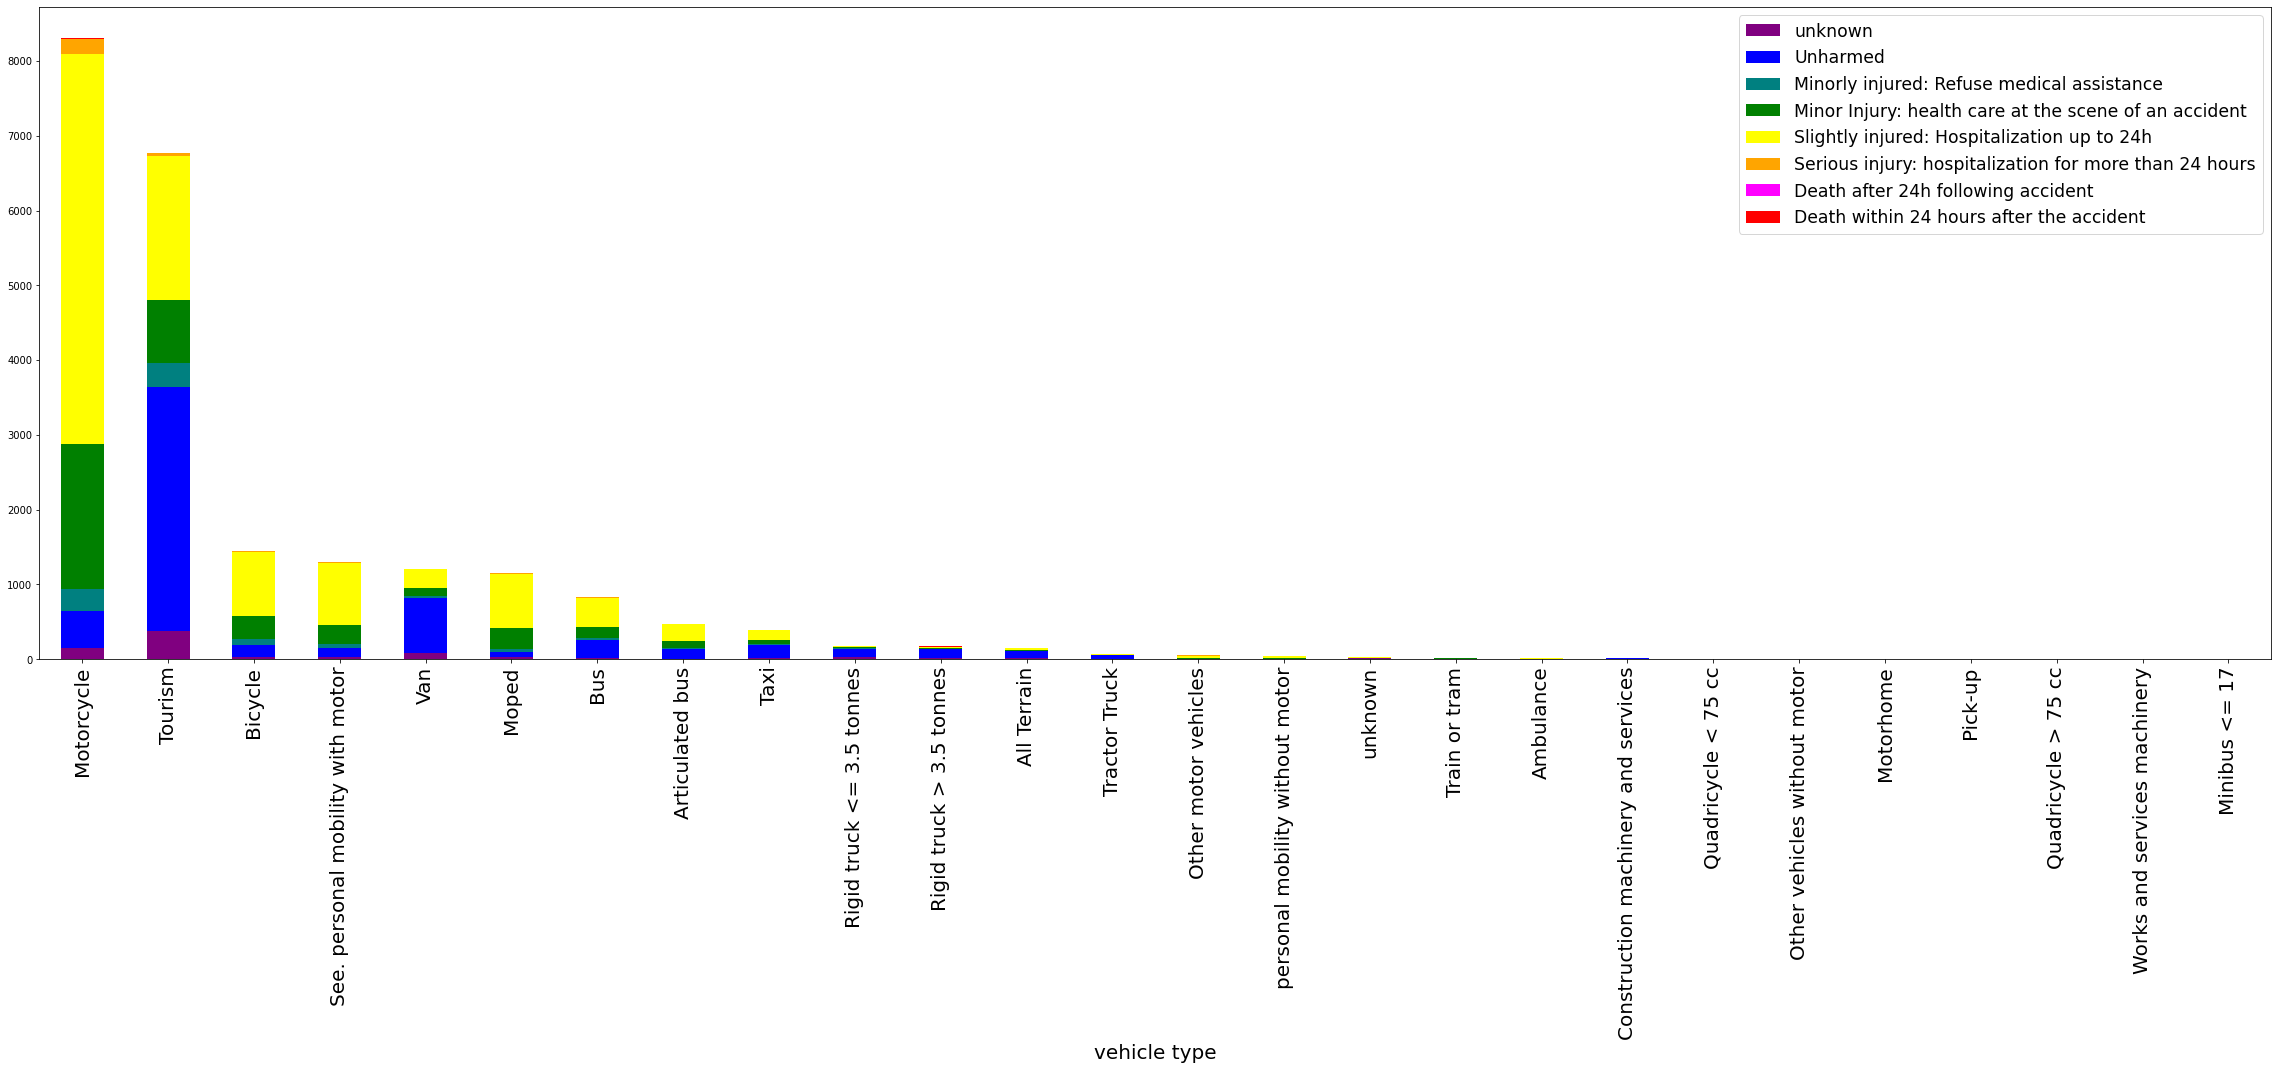

In [101]:
fig, ax = plt.subplots(figsize = (40,12))
injury_level = ['purple','blue','teal','green','yellow','orange','magenta','red']
v_vs_a.plot(kind = 'bar', stacked=True, color=injury_level, ax = ax)
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('vehicle type',fontsize = 20)
ax.set_xticklabels(sort_cars,fontsize=20)
plt.show()

# Closer look at our largest data in our vehicle analysis

In [102]:
v_vs_a.iloc[:(int(v_vs_a.shape[0]-17)),:]

accident_result,unknown,Unharmed,Minorly injured: Refuse medical assistance,Minor Injury: health care at the scene of an accident,Slightly injured: Hospitalization up to 24h,Serious injury: hospitalization for more than 24 hours,Death after 24h following accident,Death within 24 hours after the accident
vehicle_type_involved,,,,,,,,
Motorcycle,144.0,495.0,300.0,1938.0,5223.0,193.0,1.0,16.0
Tourism,382.0,3256.0,323.0,837.0,1936.0,34.0,0.0,4.0
Bicycle,34.0,154.0,76.0,318.0,852.0,15.0,0.0,1.0
See. personal mobility with motor,29.0,118.0,61.0,249.0,827.0,17.0,0.0,3.0
Van,83.0,729.0,34.0,101.0,258.0,5.0,0.0,0.0
Moped,30.0,63.0,45.0,276.0,723.0,13.0,0.0,0.0
Bus,11.0,239.0,29.0,147.0,393.0,17.0,0.0,1.0
Articulated bus,5.0,128.0,17.0,97.0,222.0,4.0,0.0,0.0
Taxi,20.0,173.0,14.0,51.0,127.0,1.0,0.0,0.0


In [103]:
list(sort_cars)[0:9]

['Motorcycle',
 'Tourism',
 'Bicycle',
 'See. personal mobility with motor',
 'Van',
 'Moped',
 'Bus',
 'Articulated bus',
 'Taxi']

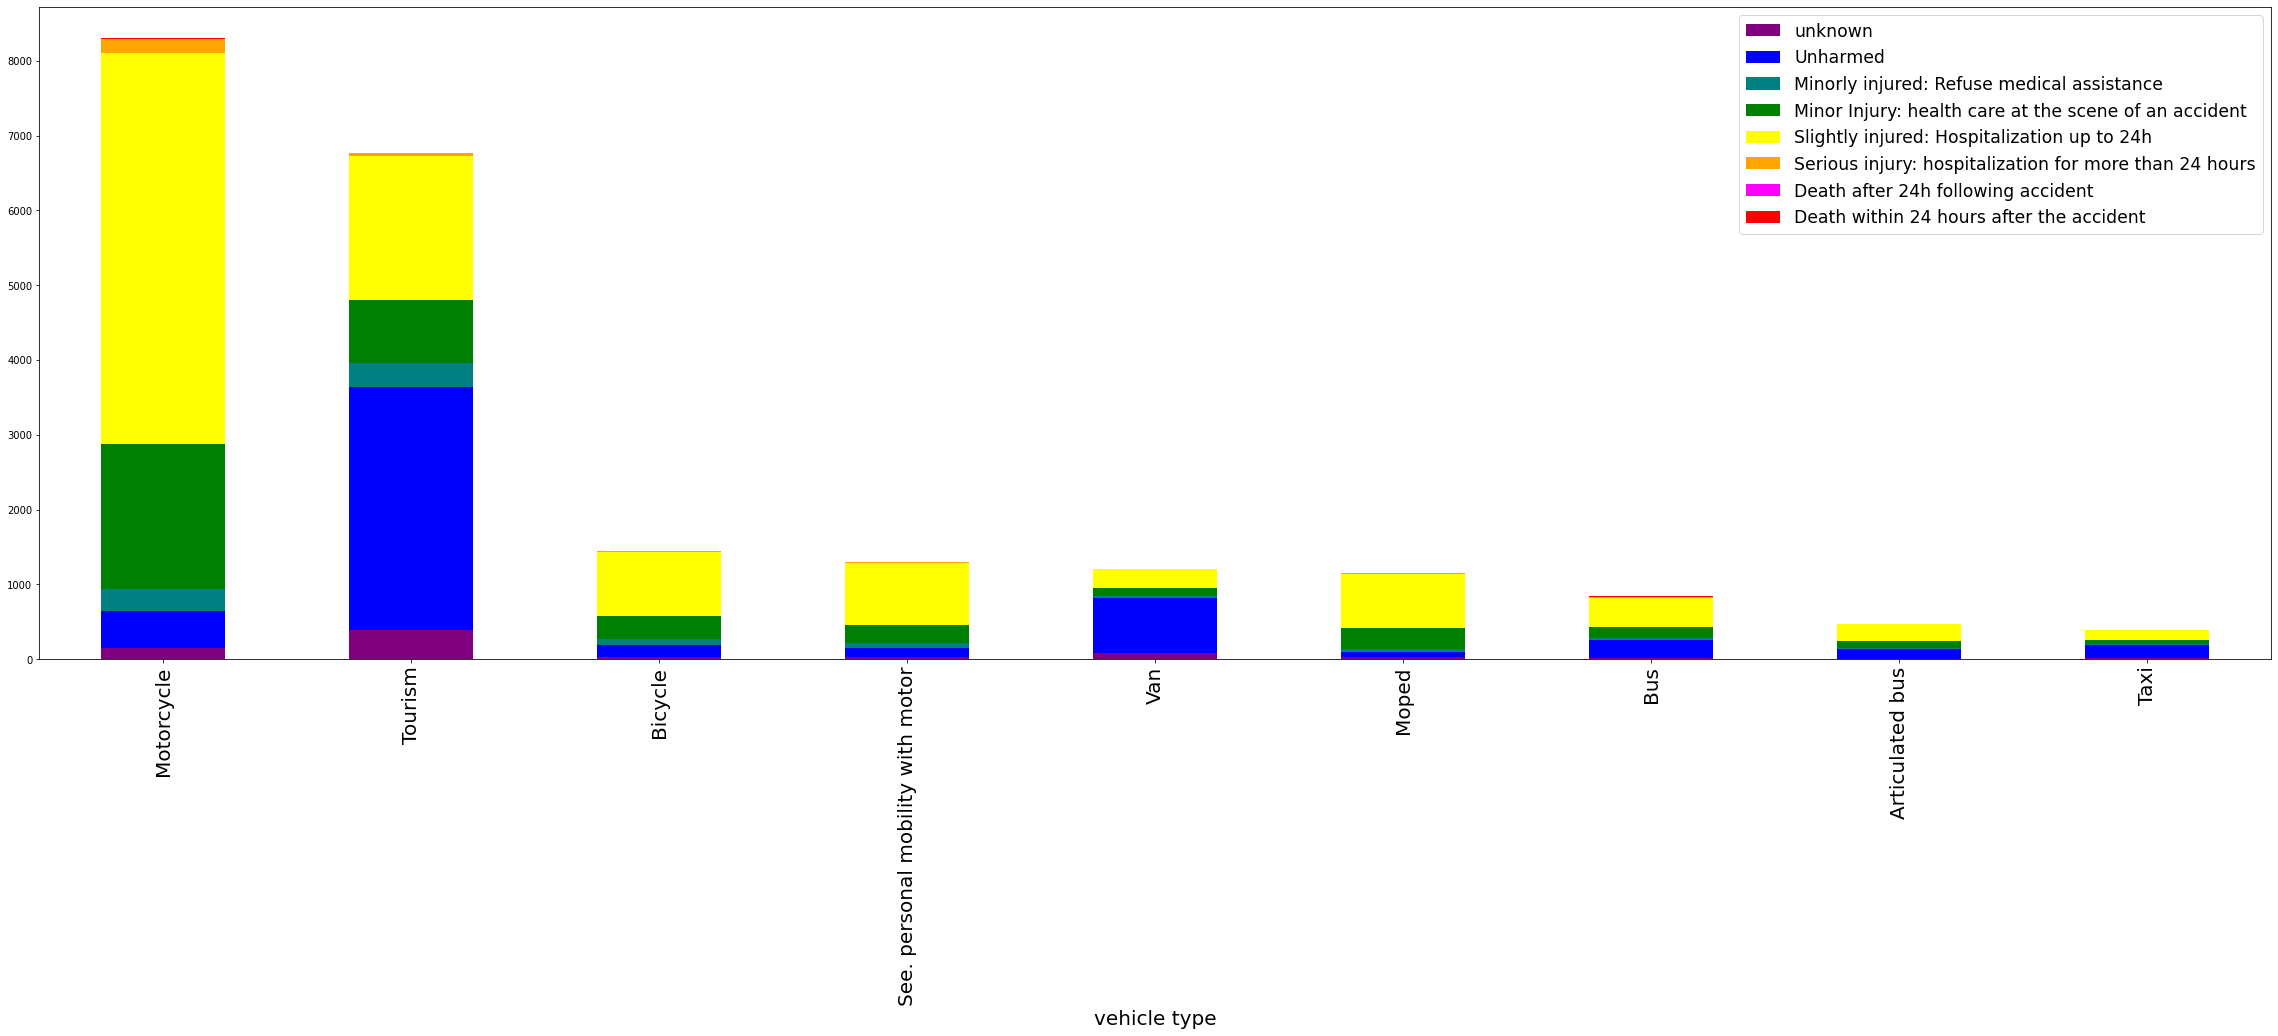

In [104]:
fig, ax = plt.subplots(figsize = (40,12))
injury_level = ['purple','blue','teal','green','yellow','orange','magenta','red']
v_vs_a.iloc[:(int(v_vs_a.shape[0]-17)),:].plot(kind = 'bar', stacked=True, color=injury_level, ax = ax)
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('vehicle type',fontsize = 20)
ax.set_xticklabels(sort_cars[0:9],fontsize=20)
plt.show()

# Closer look at smaller incidents in our vehicle analysis

In [105]:
v_vs_a.iloc[(int(v_vs_a.shape[0]-17)):,:]

accident_result,unknown,Unharmed,Minorly injured: Refuse medical assistance,Minor Injury: health care at the scene of an accident,Slightly injured: Hospitalization up to 24h,Serious injury: hospitalization for more than 24 hours,Death after 24h following accident,Death within 24 hours after the accident
vehicle_type_involved,,,,,,,,
Rigid truck <= 3.5 tonnes,23.0,118.0,2.0,15.0,19.0,0.0,0.0,0.0
Rigid truck > 3.5 tonnes,20.0,114.0,3.0,12.0,17.0,3.0,0.0,1.0
All Terrain,12.0,94.0,1.0,14.0,22.0,2.0,0.0,0.0
Tractor Truck,5.0,45.0,1.0,5.0,7.0,1.0,0.0,0.0
Other motor vehicles,1.0,7.0,1.0,12.0,27.0,2.0,0.0,0.0
personal mobility without motor,1.0,6.0,2.0,5.0,22.0,0.0,0.0,0.0
unknown,18.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0
Train or tram,0.0,9.0,0.0,3.0,8.0,0.0,0.0,0.0
Ambulance,0.0,4.0,0.0,3.0,7.0,1.0,0.0,0.0


In [106]:
list(sort_cars[(int(v_vs_a.shape[0]-17)):])

['Rigid truck <= 3.5 tonnes',
 'Rigid truck > 3.5 tonnes',
 'All Terrain',
 'Tractor Truck',
 'Other motor vehicles',
 'personal mobility without motor',
 'unknown',
 'Train or tram',
 'Ambulance',
 'Construction machinery and services',
 'Quadricycle < 75 cc',
 'Other vehicles without motor',
 'Motorhome',
 'Pick-up',
 'Quadricycle > 75 cc',
 'Works and services machinery',
 'Minibus <= 17']

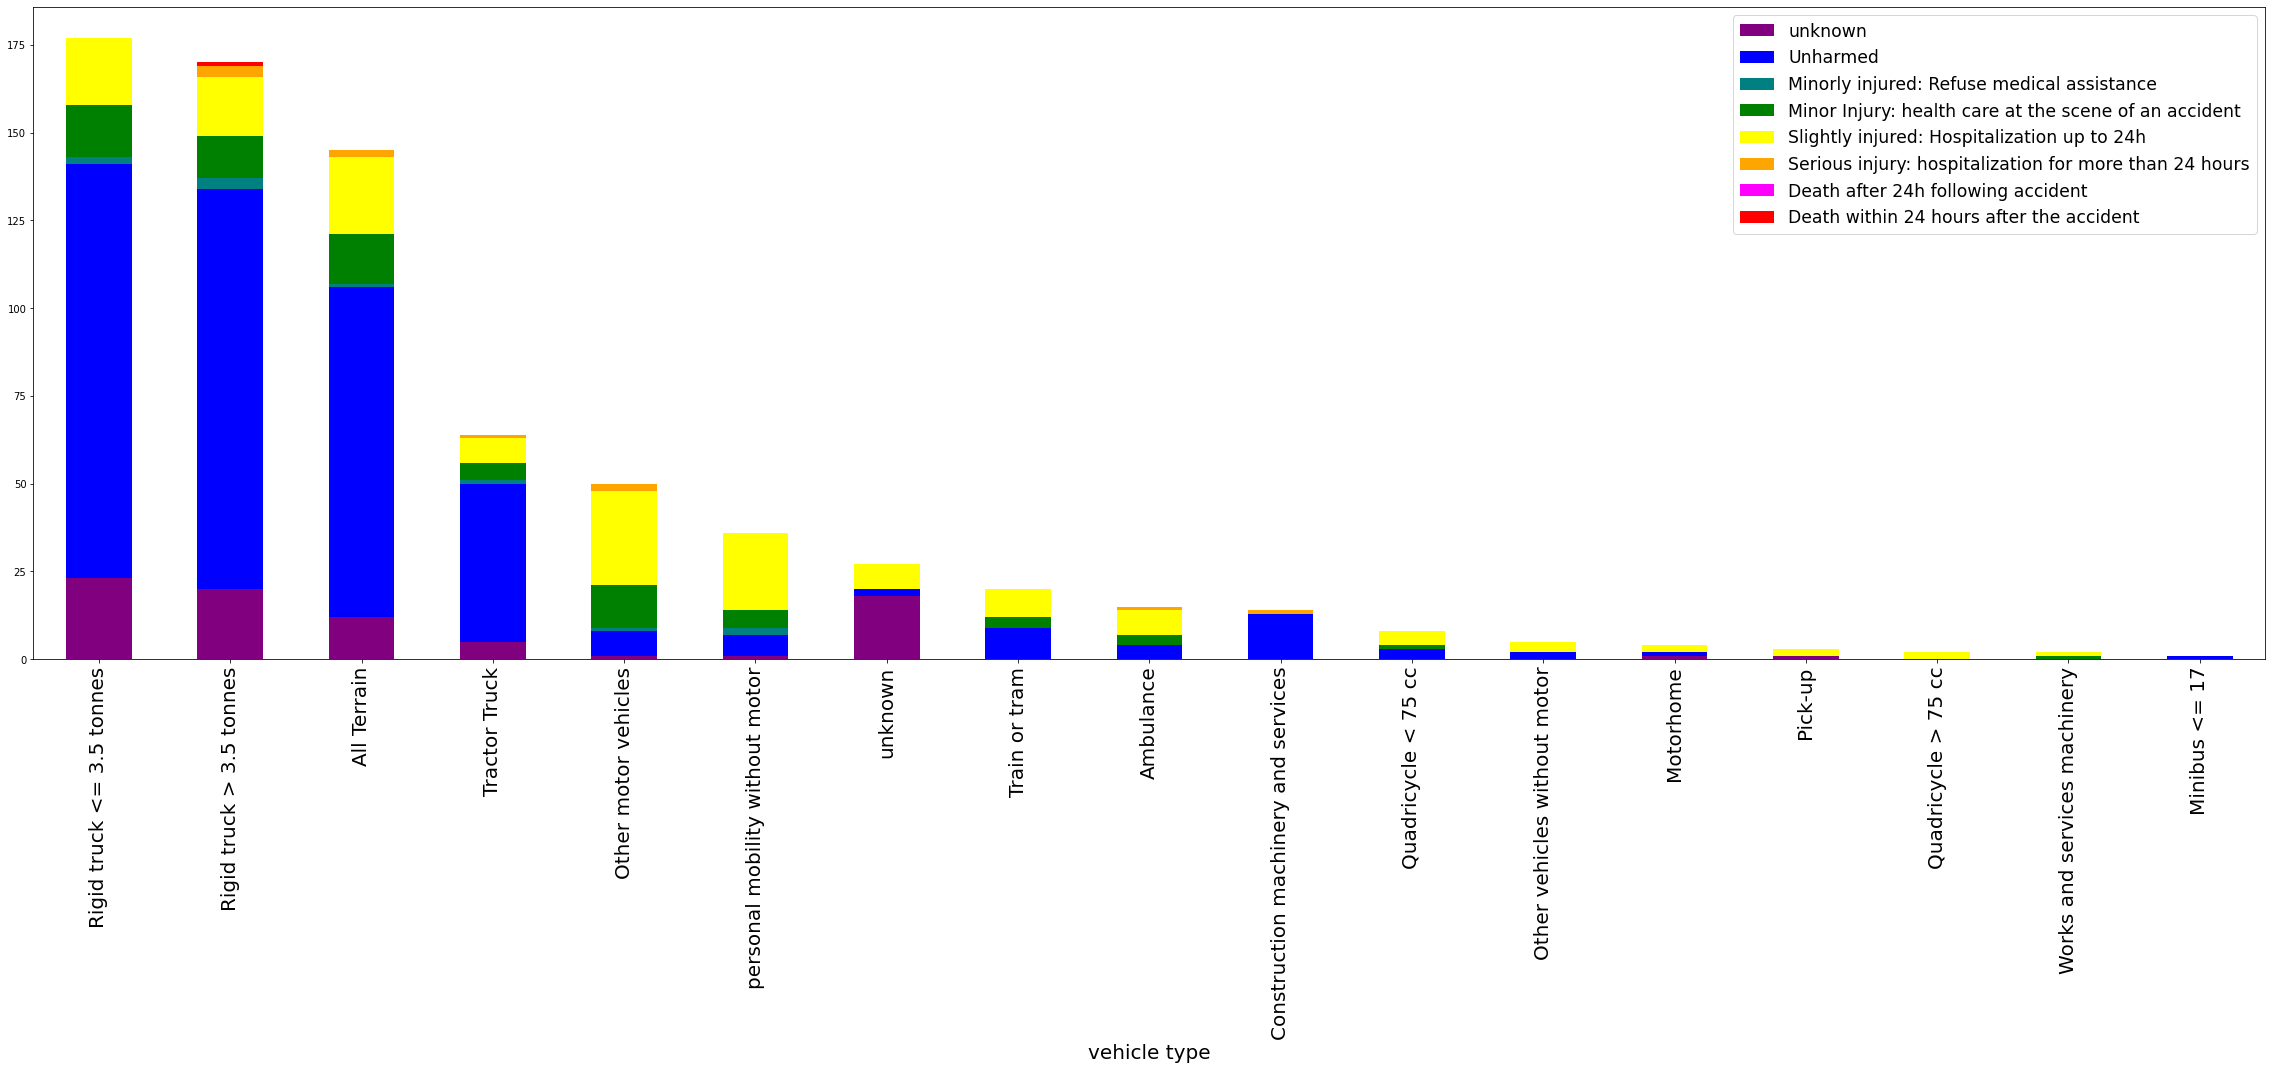

In [107]:
fig, ax = plt.subplots(figsize = (40,12))
injury_level = ['purple','blue','teal','green','yellow','orange','magenta','red']
v_vs_a.iloc[(int(v_vs_a.shape[0]-17)):,:].plot(kind = 'bar', stacked=True, color=injury_level, ax = ax)
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('vehicle type',fontsize = 20)
ax.set_xticklabels(sort_cars[(int(v_vs_a.shape[0]-17)):],fontsize=20)
plt.show()

# Month vs crash type

In [108]:
month_vs_crash = data.groupby(['month_name','accident_result']).size().unstack()

In [109]:
# month_vs_crash.groupby(level = 'month_name').sum()

In [110]:
# month_vs_crash.where(month_vs_crash != np.NaN, 0)

In [111]:
month_vs_crash = month_vs_crash.fillna(0)

In [112]:
month_vs_crash = month_vs_crash[['unknown','Unharmed','Minorly injured: Refuse medical assistance','Minor Injury: health care at the scene of an accident','Slightly injured: Hospitalization up to 24h','Serious injury: hospitalization for more than 24 hours','Death after 24h following accident','Death within 24 hours after the accident']]

In [113]:
sort_month = month_vs_crash.sum(axis = 1).sort_values(ascending=False).index

In [114]:
month_vs_crash = month_vs_crash.reindex(sort_month)

In [115]:
month_vs_crash

accident_result,unknown,Unharmed,Minorly injured: Refuse medical assistance,Minor Injury: health care at the scene of an accident,Slightly injured: Hospitalization up to 24h,Serious injury: hospitalization for more than 24 hours,Death after 24h following accident,Death within 24 hours after the accident
month_name,,,,,,,,
February,92.0,735.0,65.0,372.0,1055.0,36.0,0.0,1.0
January,65.0,716.0,72.0,395.0,999.0,35.0,0.0,2.0
July,84.0,591.0,87.0,459.0,1027.0,25.0,0.0,2.0
December,89.0,547.0,121.0,360.0,1031.0,21.0,0.0,3.0
October,100.0,562.0,77.0,322.0,1065.0,24.0,0.0,2.0
September,67.0,584.0,88.0,380.0,974.0,27.0,0.0,3.0
November,68.0,486.0,103.0,351.0,992.0,20.0,1.0,1.0
June,56.0,446.0,83.0,376.0,920.0,29.0,0.0,2.0
March,67.0,399.0,76.0,287.0,824.0,24.0,0.0,3.0


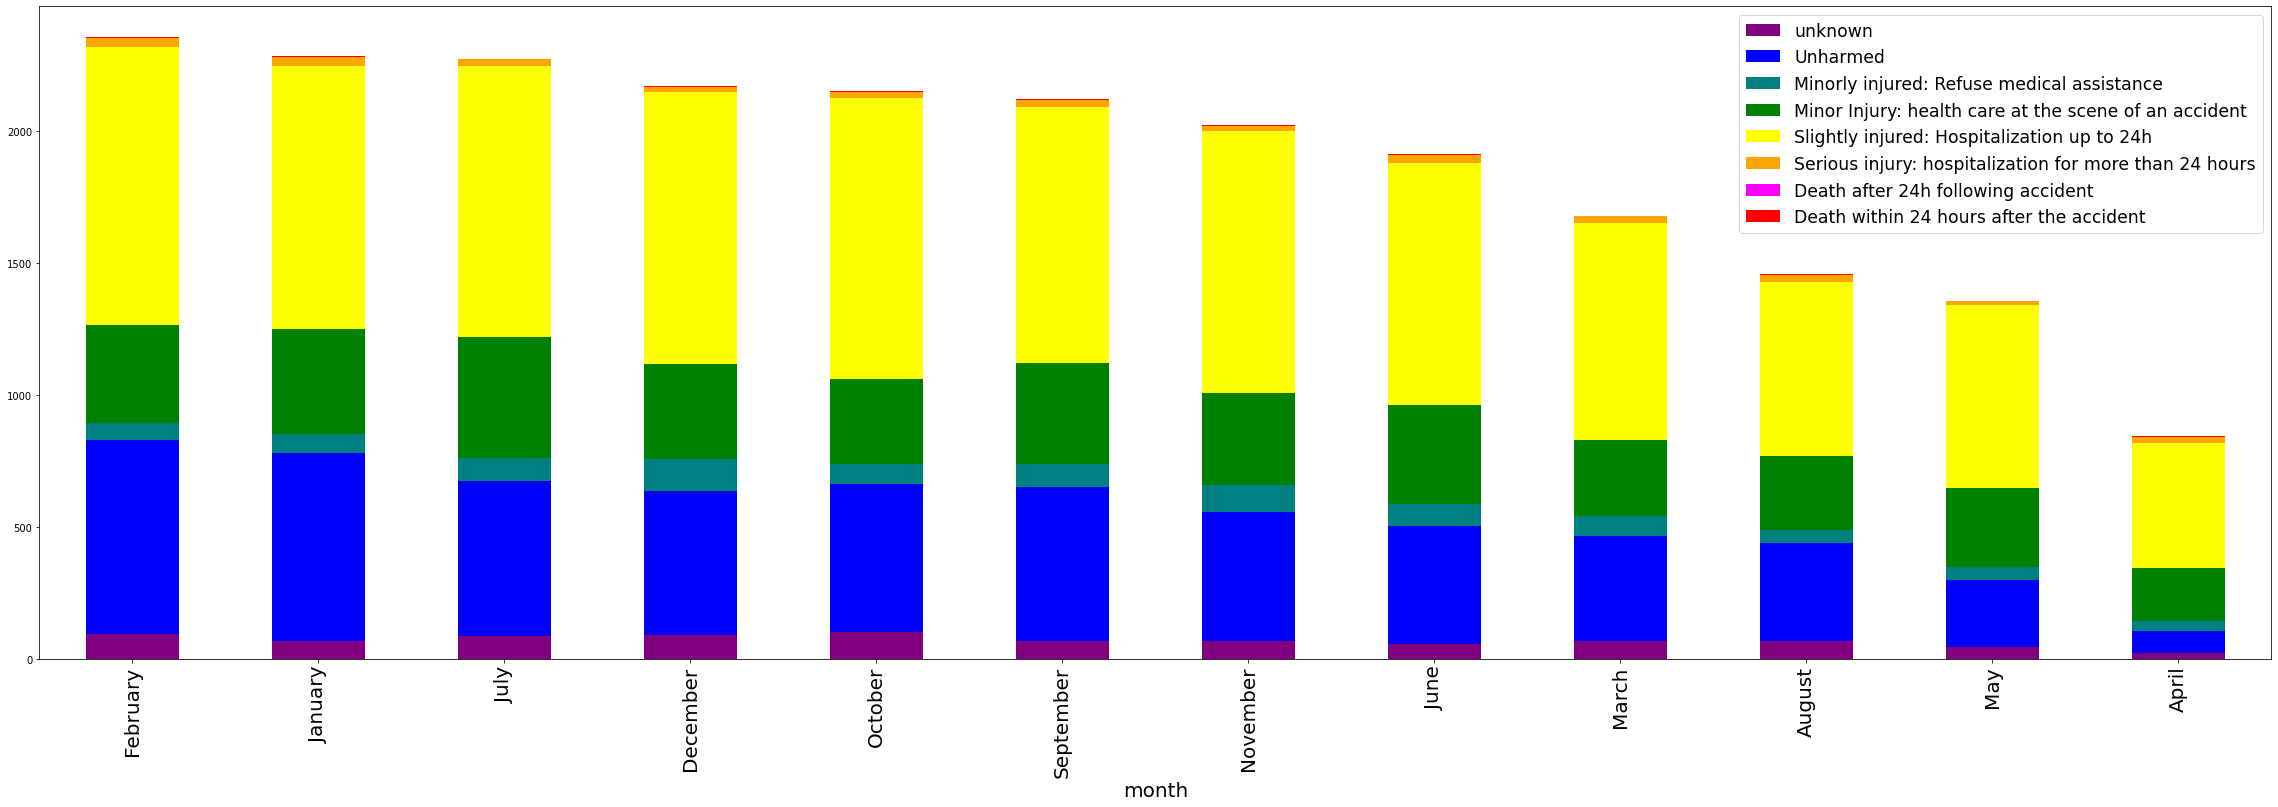

In [116]:
fig, ax = plt.subplots(figsize = (40,12))
injury_level = ['purple','blue','teal','green','yellow','orange','magenta','red']
month_vs_crash.plot(kind = 'bar', stacked=True, color=injury_level, ax = ax)
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('month',fontsize = 20)
ax.set_xticklabels(sort_month,fontsize=20)
plt.show()

# Time of day vs crash type

In [117]:
time_vs_crash = data.groupby(['time_of_day','accident_result']).size().unstack()

In [118]:
time_vs_crash = time_vs_crash[['unknown','Unharmed','Minorly injured: Refuse medical assistance','Minor Injury: health care at the scene of an accident','Slightly injured: Hospitalization up to 24h','Serious injury: hospitalization for more than 24 hours','Death after 24h following accident','Death within 24 hours after the accident']]

In [119]:
time_vs_crash = time_vs_crash.where(~time_vs_crash.isnull(), 0) #hehe

In [120]:
# time_vs_crash != np.nan
# type(np.NaN)

In [121]:
sort_time = time_vs_crash.sum(axis=1).sort_values(ascending = False).index

In [122]:
time_vs_crash = time_vs_crash.reindex(sort_time)

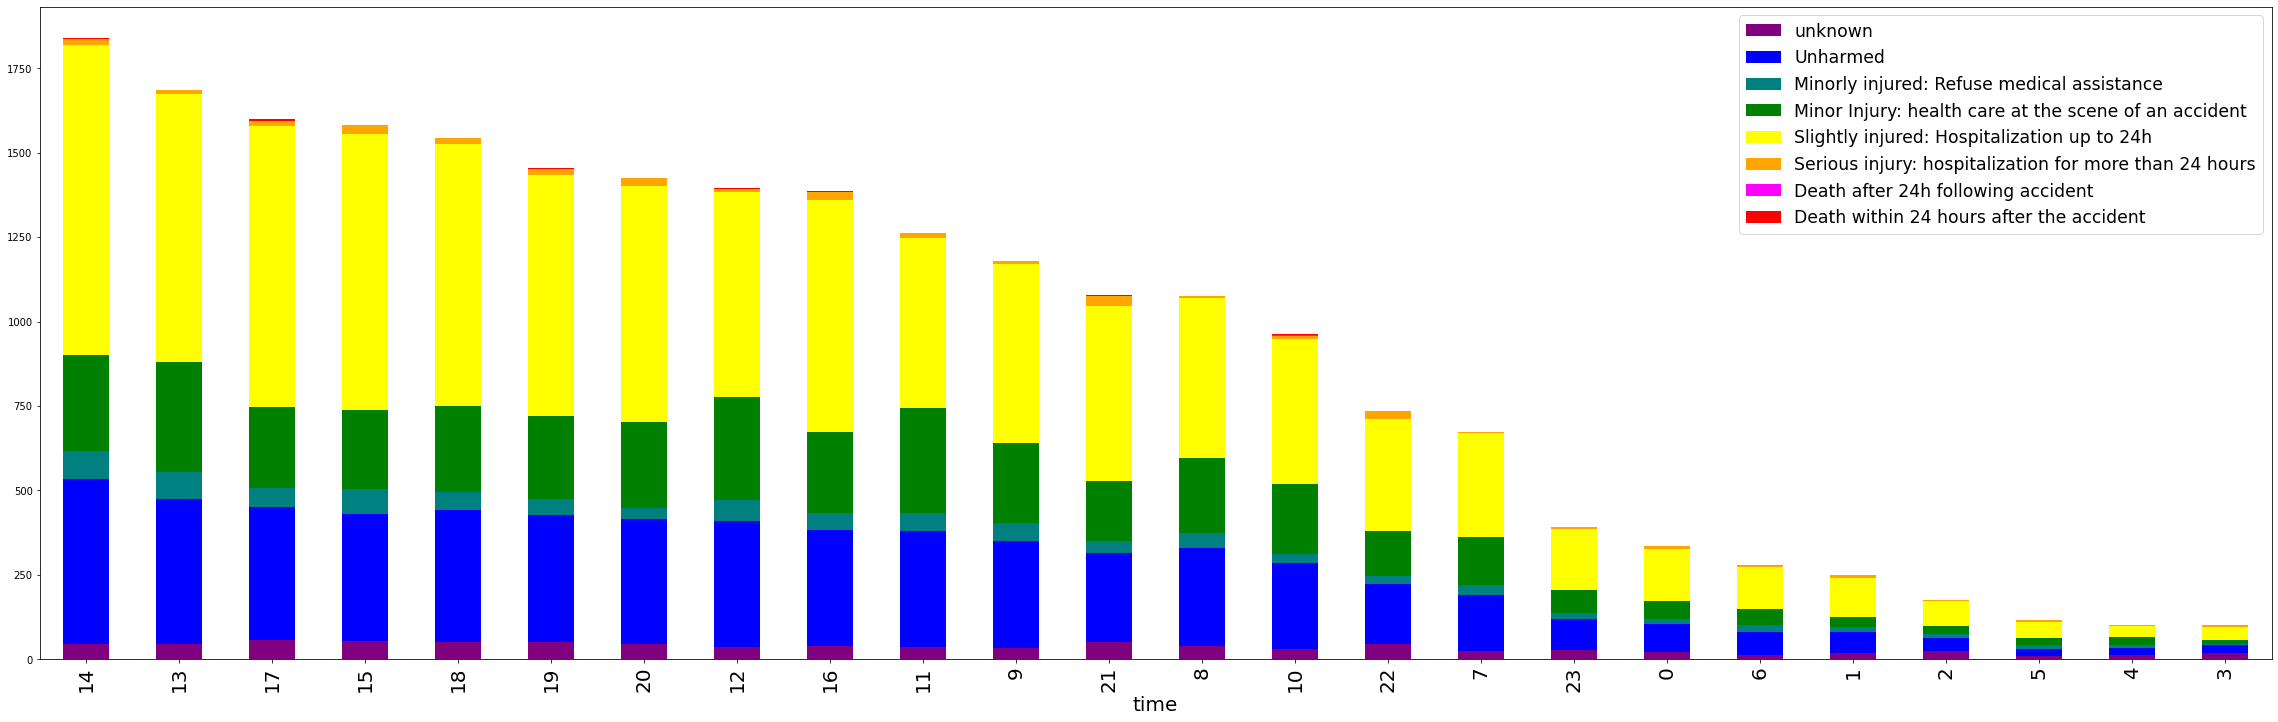

In [123]:
fig, ax = plt.subplots(figsize = (40,12))
injury_level = ['purple','blue','teal','green','yellow','orange','magenta','red']
time_vs_crash.plot(kind = 'bar', stacked=True, color=injury_level, ax = ax)
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('time',fontsize = 20)
ax.set_xticklabels(sort_time,fontsize=20)
plt.show()

## Experimentation with dataset for Pie Chart

In [124]:
v_vs_a.columns

Index(['unknown', 'Unharmed', 'Minorly injured: Refuse medical assistance',
       'Minor Injury: health care at the scene of an accident',
       'Slightly injured: Hospitalization up to 24h',
       'Serious injury: hospitalization for more than 24 hours',
       'Death after 24h following accident',
       'Death within 24 hours after the accident'],
      dtype='object', name='accident_result')

In [125]:
v_vs_a.loc['Motorcycle',:]/v_vs_a.loc['Motorcycle',:].sum()*100

accident_result
unknown                                                    1.732852
Unharmed                                                   5.956679
Minorly injured: Refuse medical assistance                 3.610108
Minor Injury: health care at the scene of an accident     23.321300
Slightly injured: Hospitalization up to 24h               62.851986
Serious injury: hospitalization for more than 24 hours     2.322503
Death after 24h following accident                         0.012034
Death within 24 hours after the accident                   0.192539
Name: Motorcycle, dtype: float64

In [126]:
list(v_vs_a.loc['Motorcycle',:].values)

[144.0, 495.0, 300.0, 1938.0, 5223.0, 193.0, 1.0, 16.0]

In [127]:
list(v_vs_a.loc['Motorcycle',:].index)

['unknown',
 'Unharmed',
 'Minorly injured: Refuse medical assistance',
 'Minor Injury: health care at the scene of an accident',
 'Slightly injured: Hospitalization up to 24h',
 'Serious injury: hospitalization for more than 24 hours',
 'Death after 24h following accident',
 'Death within 24 hours after the accident']

In [128]:
list_of_percent = list((v_vs_a.loc['Motorcycle',:]/v_vs_a.loc['Motorcycle',:].sum()*100).values.round(2))

In [129]:
str_list = [str(x) for x in list_of_percent]

In [130]:
injury_str = list(v_vs_a.loc['Motorcycle',:].index)

In [131]:
super_str = [x+ ': ' + y+'%' for x,y in zip(injury_str,str_list)]

In [132]:
super_str

['unknown: 1.73%',
 'Unharmed: 5.96%',
 'Minorly injured: Refuse medical assistance: 3.61%',
 'Minor Injury: health care at the scene of an accident: 23.32%',
 'Slightly injured: Hospitalization up to 24h: 62.85%',
 'Serious injury: hospitalization for more than 24 hours: 2.32%',
 'Death after 24h following accident: 0.01%',
 'Death within 24 hours after the accident: 0.19%']

In [133]:
# Pie Chart

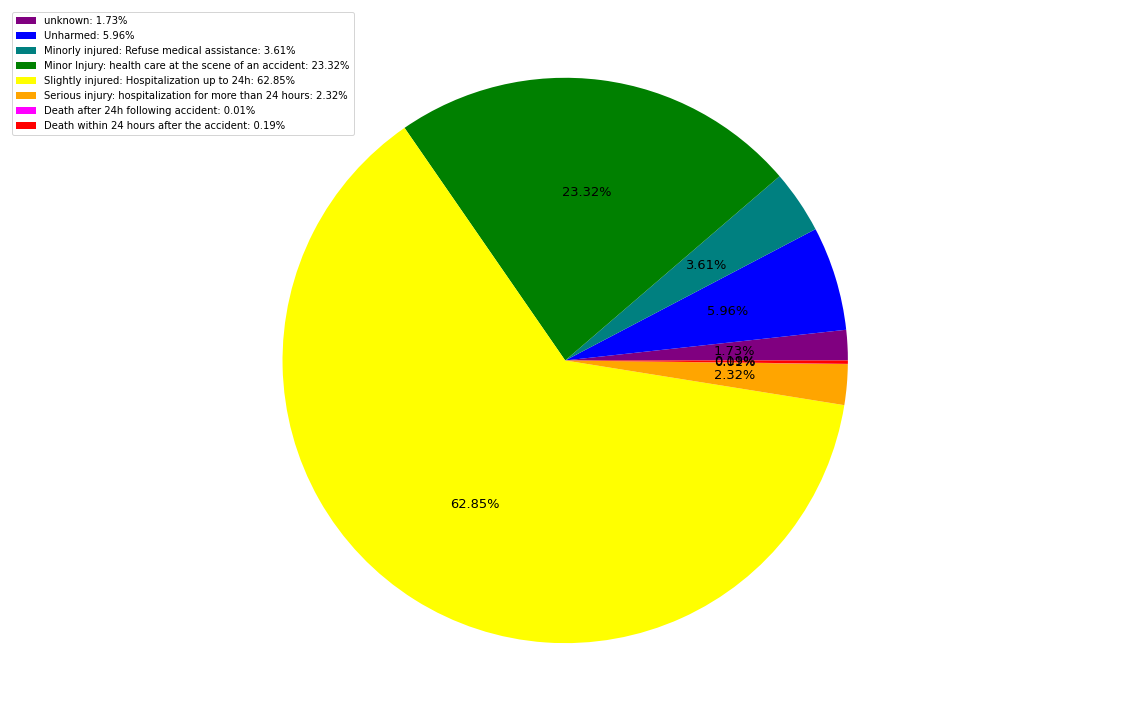

In [134]:
fig, ax = plt.subplots(figsize = (20,13))

ax.axis('equal')
plt.pie(list(v_vs_a.loc['Motorcycle',:].values),labels = v_vs_a.columns, colors= injury_level, textprops=dict(color="black", fontsize = 13, multialignment= 'center' ),autopct='%1.2f%%', labeldistance= None)
ax.xaxis.label.set_color('red')
ax.legend(labels=super_str)
plt.show()

In [135]:
tourism_stats = v_vs_a.loc['Tourism',:]/v_vs_a.loc['Tourism',:].sum()*100

In [136]:
tourism_injury = list(tourism_stats.index)

In [137]:
tourism_percent_str = [str(x) for x in list(tourism_stats.values)]

In [138]:
tourism_percent_str = [str(x) for x in list(tourism_stats.values.round(2))]

In [139]:
tourism_legend = [x + ': ' + y + '%' for x,y in zip(tourism_injury,tourism_percent_str)]

In [140]:
tourism_legend

['unknown: 5.64%',
 'Unharmed: 48.08%',
 'Minorly injured: Refuse medical assistance: 4.77%',
 'Minor Injury: health care at the scene of an accident: 12.36%',
 'Slightly injured: Hospitalization up to 24h: 28.59%',
 'Serious injury: hospitalization for more than 24 hours: 0.5%',
 'Death after 24h following accident: 0.0%',
 'Death within 24 hours after the accident: 0.06%']

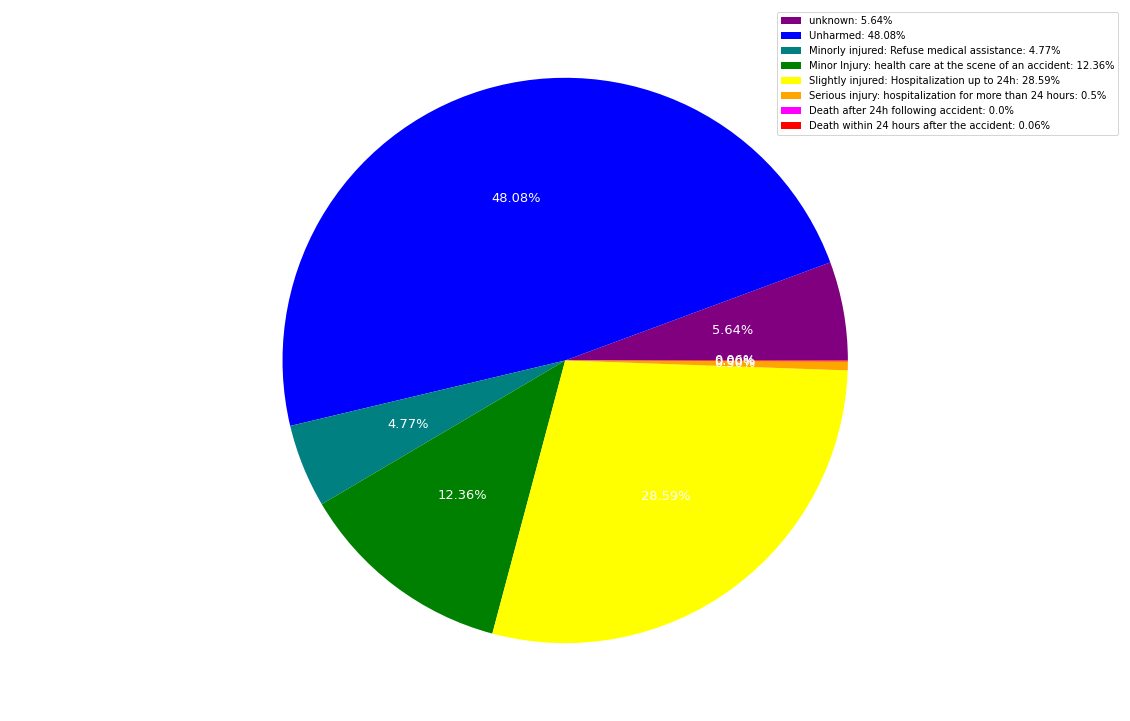

In [141]:
fig, ax = plt.subplots(figsize = (20,13))

ax.axis('equal')
plt.pie(list(v_vs_a.loc['Tourism',:].values),labels = v_vs_a.columns, colors= injury_level, textprops=dict(color="w", fontsize = 13, multialignment= 'center' ),autopct='%1.2f%%', labeldistance= None)
ax.xaxis.label.set_color('red')
ax.legend(labels=tourism_legend)
plt.show()

In [142]:
data.head()

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_pedestrian,reason_for_travel_driver,accident_result,longitude,latitude
0,1,Ciutat Vella,el Raval,68503,Tuesday,2021,April,13,Afternoon,20,In passage regulated by traffic lights,Bicycle,F,8.0,Pedestrian,On the sidewalk,Leisure and entertainment,unknown,Slightly injured: Hospitalization up to 24h,2.167209,41.377541
1,1,Ciutat Vella,el Raval,198804,Friday,2021,March,12,Morning,12,In passage regulated by traffic lights,Taxi,M,58.0,Pedestrian,On the sidewalk,Leisure and entertainment,unknown,Slightly injured: Hospitalization up to 24h,2.171499,41.375062
2,1,Ciutat Vella,el Raval,250904,Monday,2021,October,11,Afternoon,19,In passage regulated by traffic lights,See. personal mobility with motor,F,52.0,Pedestrian,On the sidewalk,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.169152,41.385428
3,1,Ciutat Vella,el Raval,282106,Saturday,2021,February,6,Afternoon,15,In passage regulated by traffic lights,Bicycle,M,47.0,Pedestrian,On the sidewalk,unknown,unknown,Minorly injured: Refuse medical assistance,2.166916,41.380600
4,1,Ciutat Vella,el Raval,701367,Sunday,2021,September,12,Afternoon,17,In passage regulated by traffic lights,See. personal mobility with motor,M,4.0,Pedestrian,On the sidewalk,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.170672,41.377988


# boxplot to see the medium age of victims
### interesting to note that across the past 2 years, the medium age of victims is almost exactly 40 years old!

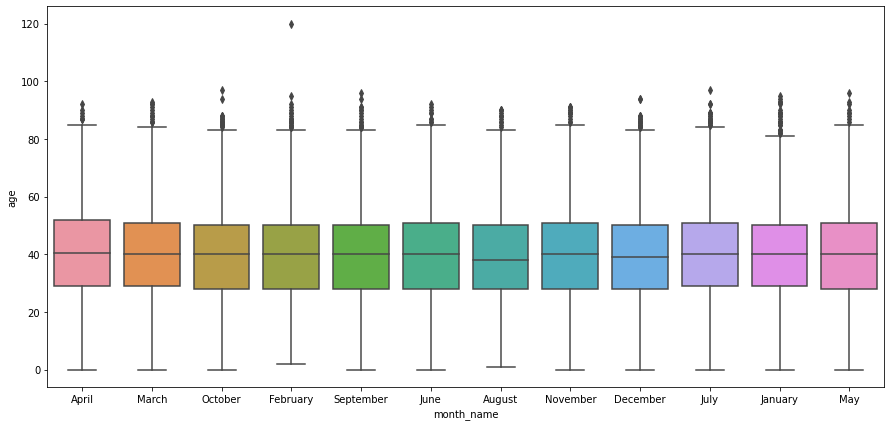

In [143]:
fig, ax = plt.subplots(figsize = (15,7))
ax = sns.boxplot(x = 'month_name', y = 'age', data = data)

# Day of Week vs Age

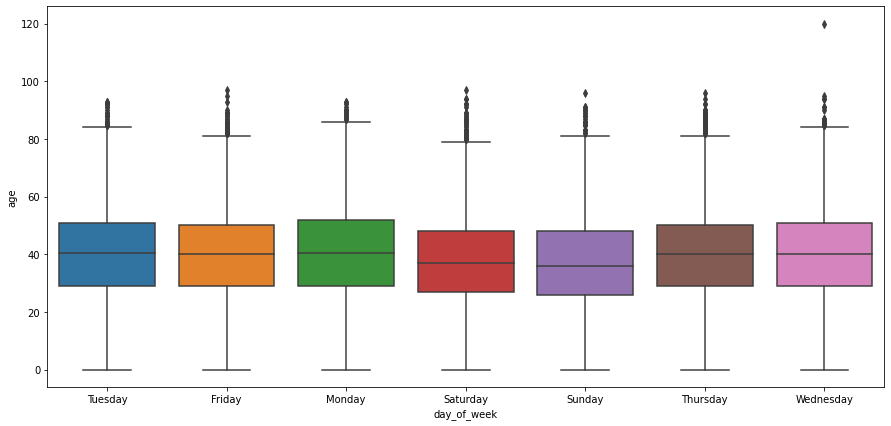

In [144]:
fig, ax = plt.subplots(figsize = (15,7))
ax = sns.boxplot(x = 'day_of_week', y = 'age', data = data)

# type of injury vs age

In [145]:
data['accident_result'].value_counts().index

Index(['Slightly injured: Hospitalization up to 24h', 'Unharmed',
       'Minor Injury: health care at the scene of an accident',
       'Minorly injured: Refuse medical assistance', 'unknown',
       'Serious injury: hospitalization for more than 24 hours',
       'Death within 24 hours after the accident',
       'Death after 24h following accident'],
      dtype='object')

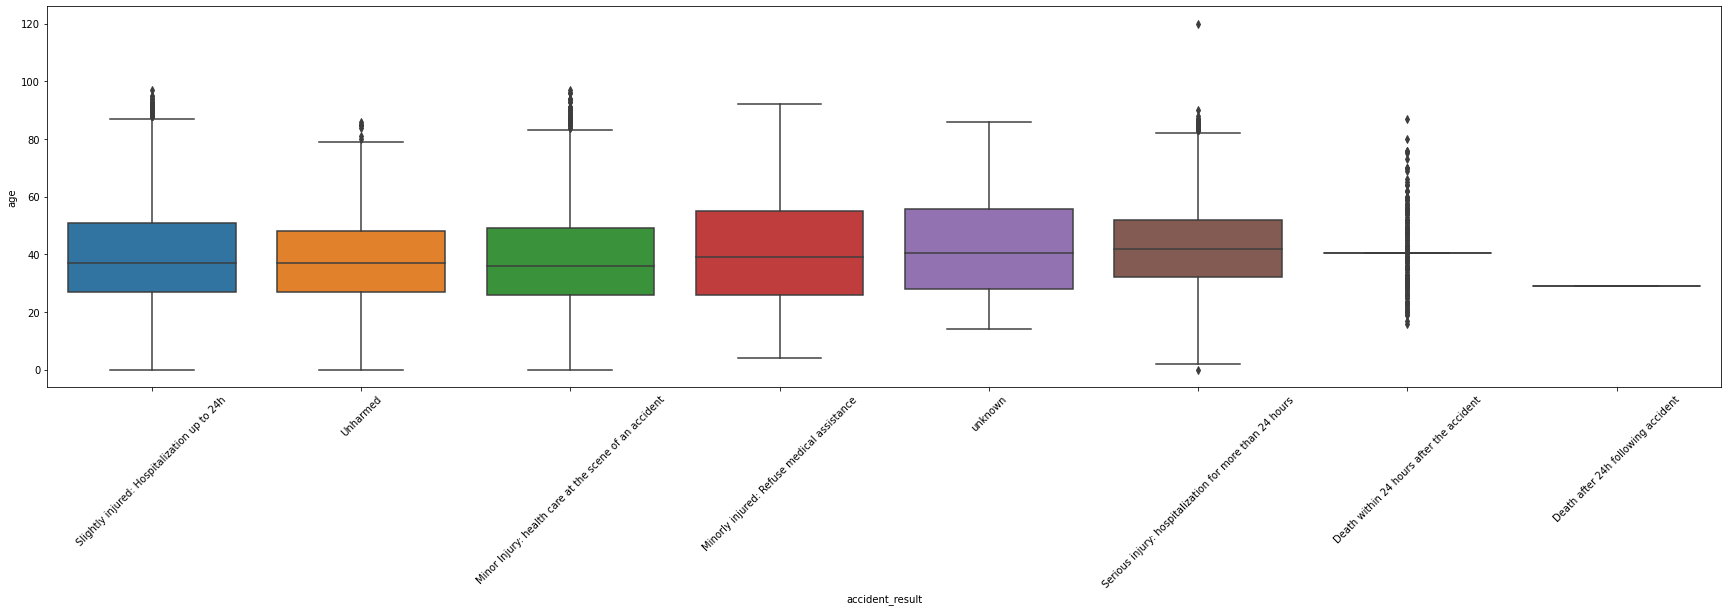

In [146]:
fig, ax = plt.subplots(figsize = (30,7))
ax = sns.boxplot(x = 'accident_result', y = 'age', data = data)
ax.set_xticklabels(labels = data['accident_result'].value_counts().index, rotation=45)
plt.show()

In [147]:
data['age'].value_counts()

40.361437     757
27.000000     590
25.000000     590
30.000000     584
29.000000     574
             ... 
94.000000       5
97.000000       2
96.000000       2
95.000000       2
120.000000      1
Name: age, Length: 100, dtype: int64

In [148]:
# fig, ax = plt.subplots(figsize = (10,5))
# ax = sns.countplot(x = 'gender', data=data)
# plt.show()

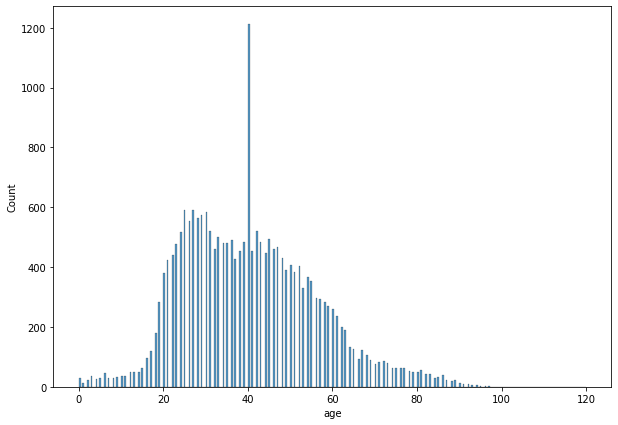

In [149]:
fig, ax = plt.subplots(figsize = (10,7))

ax = sns.histplot(x='age', data=data, bins = 300)

In [150]:
data.select_dtypes(object).nunique()

district_code                           11
district_name                           14
neighborhood_name                       79
street_code                           1343
day_of_week                              7
year                                     2
month_name                              12
day_of_month                            31
type_of_shift                            3
time_of_day                             24
description_of_cause_by_pedestrian       7
vehicle_type_involved                   26
gender                                   3
type_of_person_involved                  4
pedestrian_hit_and_run_location          7
reason_for_travel_pedestrian            10
reason_for_travel_driver                22
accident_result                          8
dtype: int64

In [151]:
count_plot_list = list(data.select_dtypes(object).nunique().index)

In [152]:
count_plot_list.pop(3) #method, does it in place

'street_code'

In [153]:
count_plot_list

['district_code',
 'district_name',
 'neighborhood_name',
 'day_of_week',
 'year',
 'month_name',
 'day_of_month',
 'type_of_shift',
 'time_of_day',
 'description_of_cause_by_pedestrian',
 'vehicle_type_involved',
 'gender',
 'type_of_person_involved',
 'pedestrian_hit_and_run_location',
 'reason_for_travel_pedestrian',
 'reason_for_travel_driver',
 'accident_result']

In [154]:
# Convert to 12-hour format

In [155]:
import datetime as dt
# data['time_of_day'] = pd.to_datetime(data['time_of_day'])

data['time_of_day'] = pd.to_datetime(data['time_of_day'], format='%H')

data['time_of_day']

data['time_of_day'] = data['time_of_day'].dt.strftime('%I:%M %p')

data['time_of_day'].nunique()

24

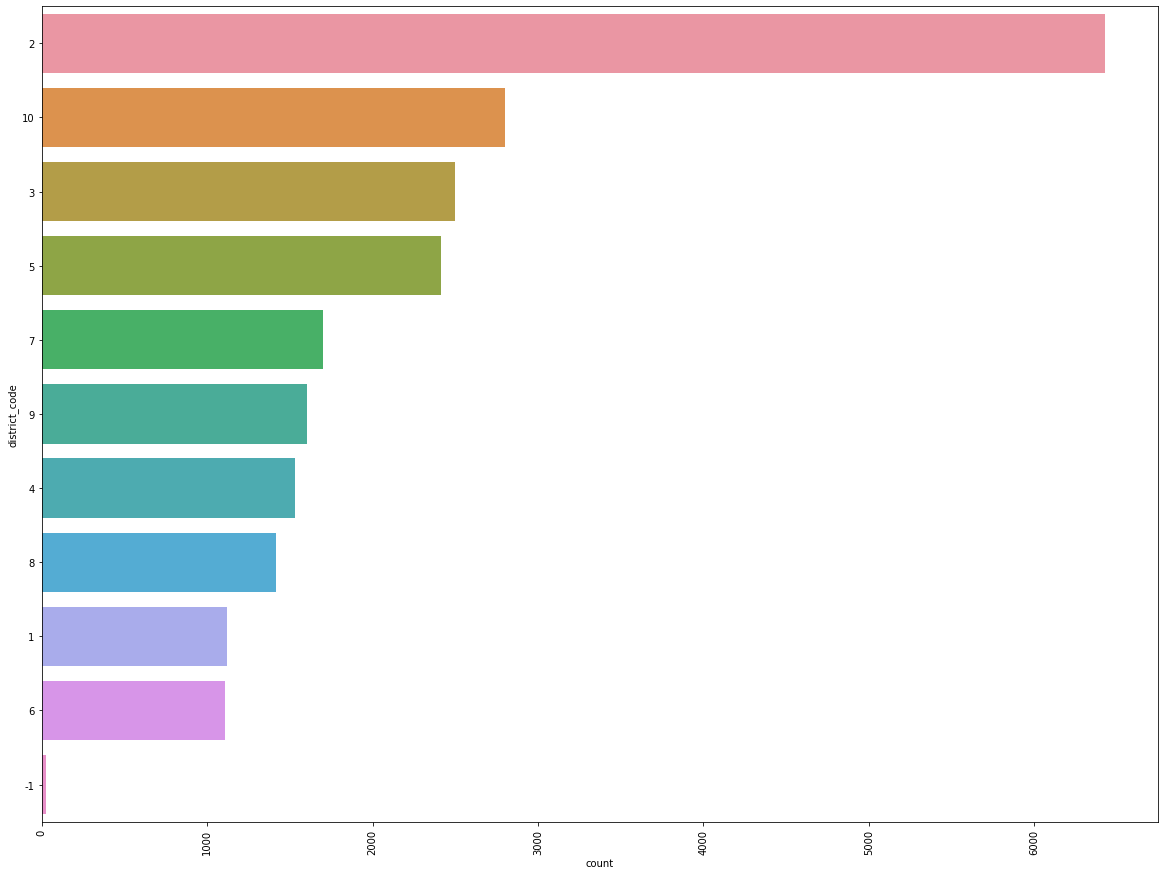

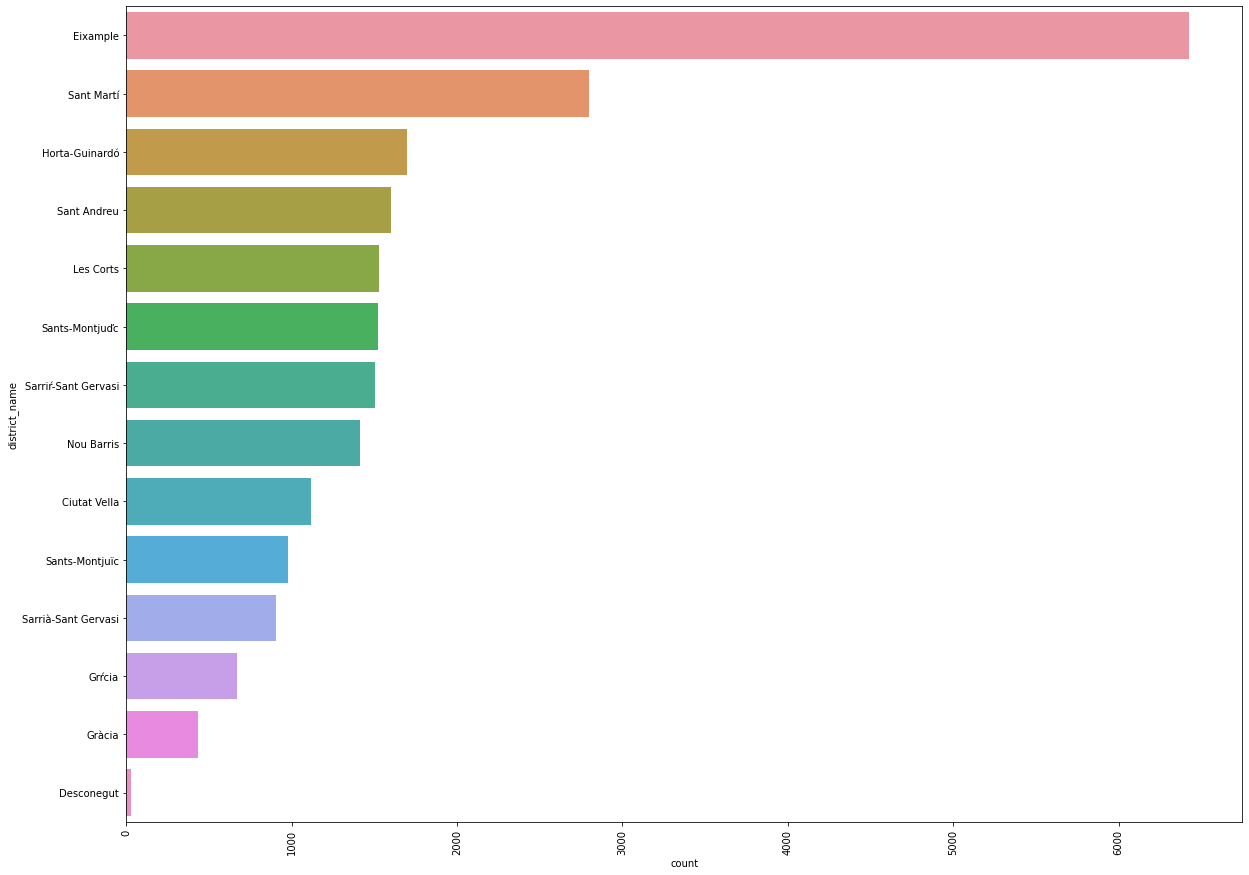

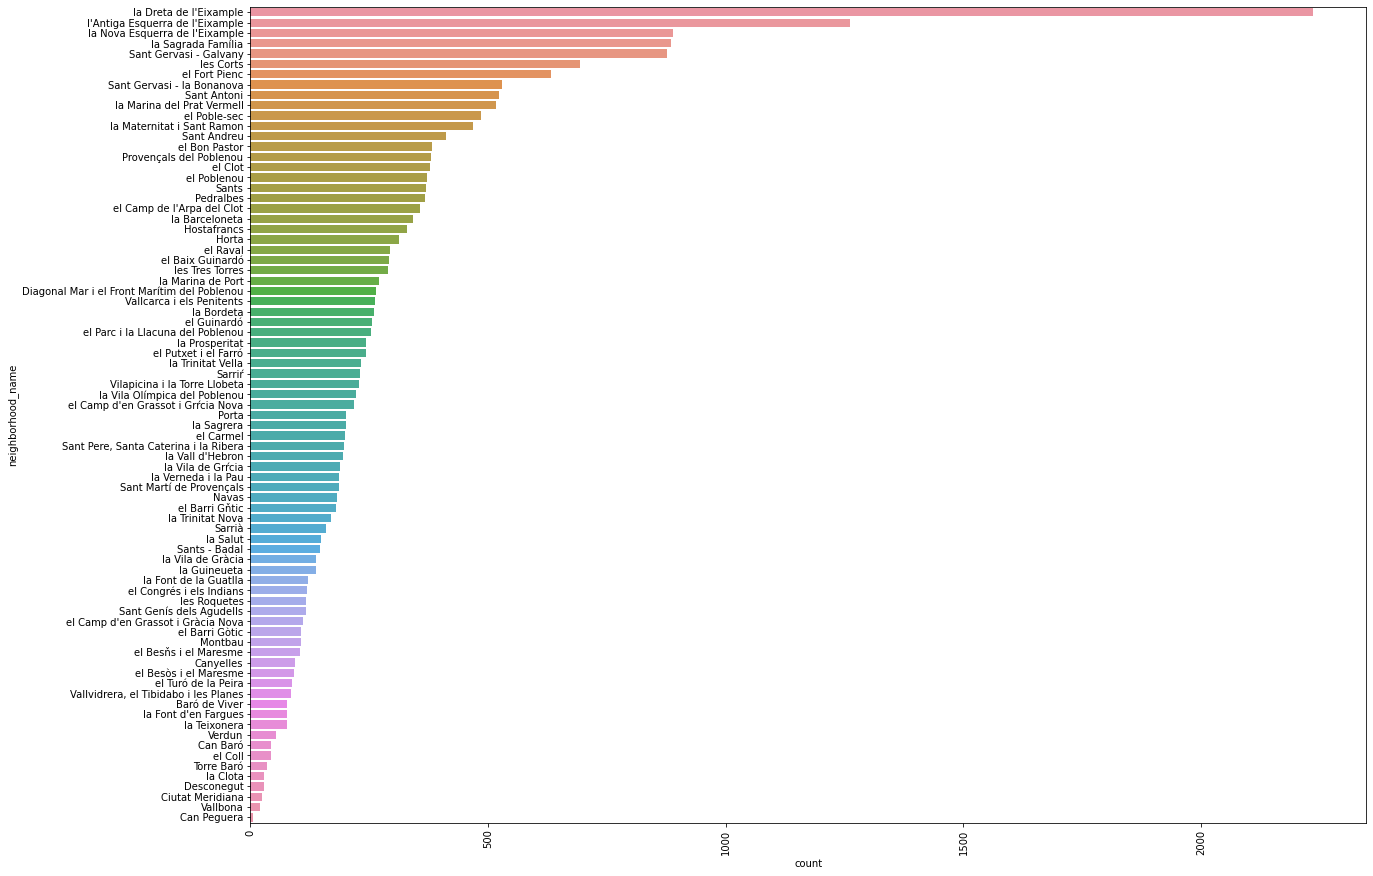

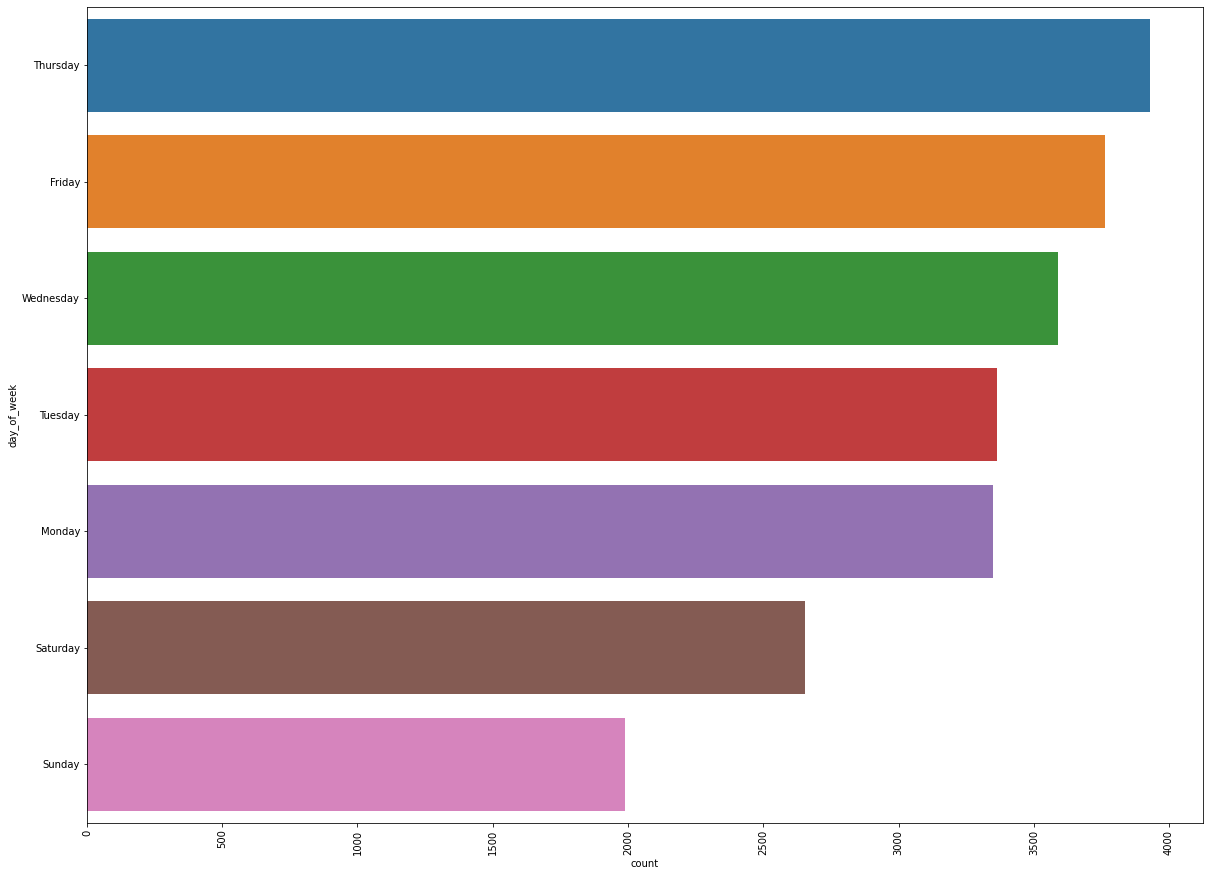

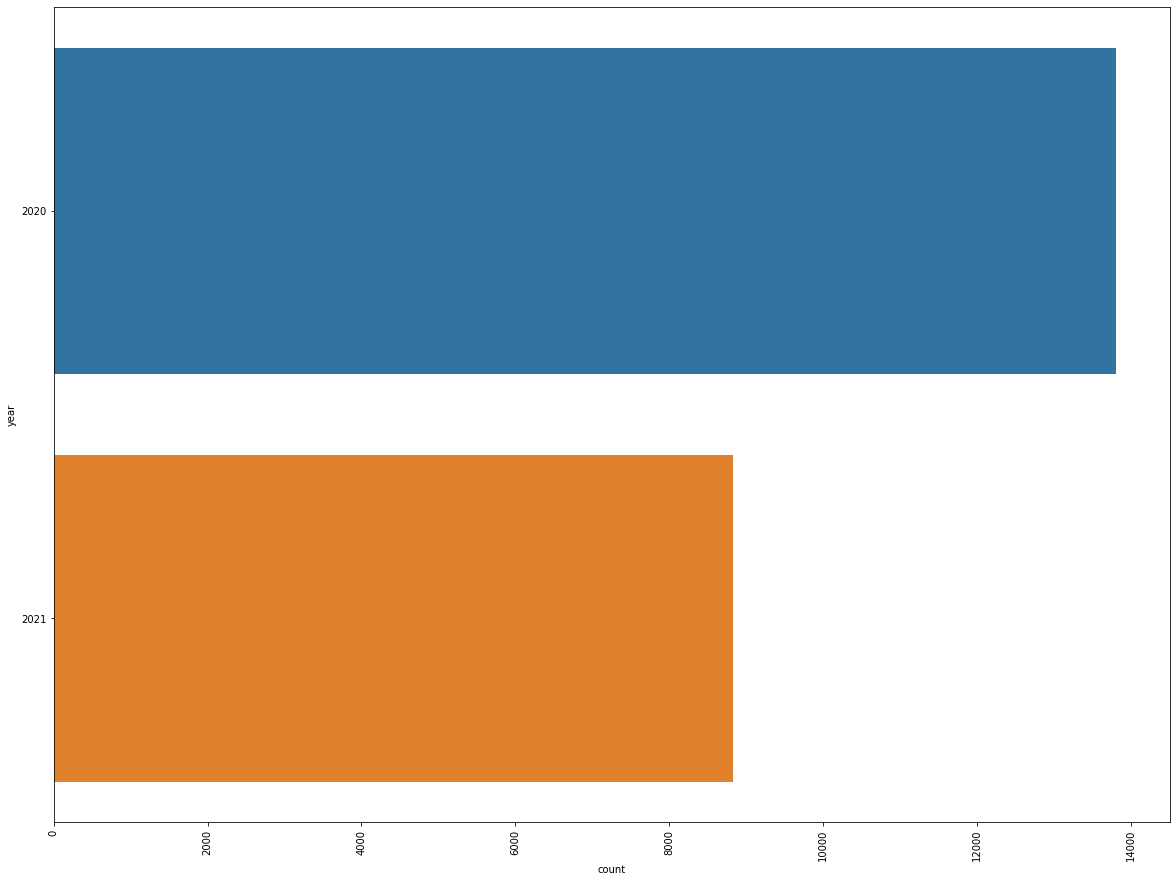

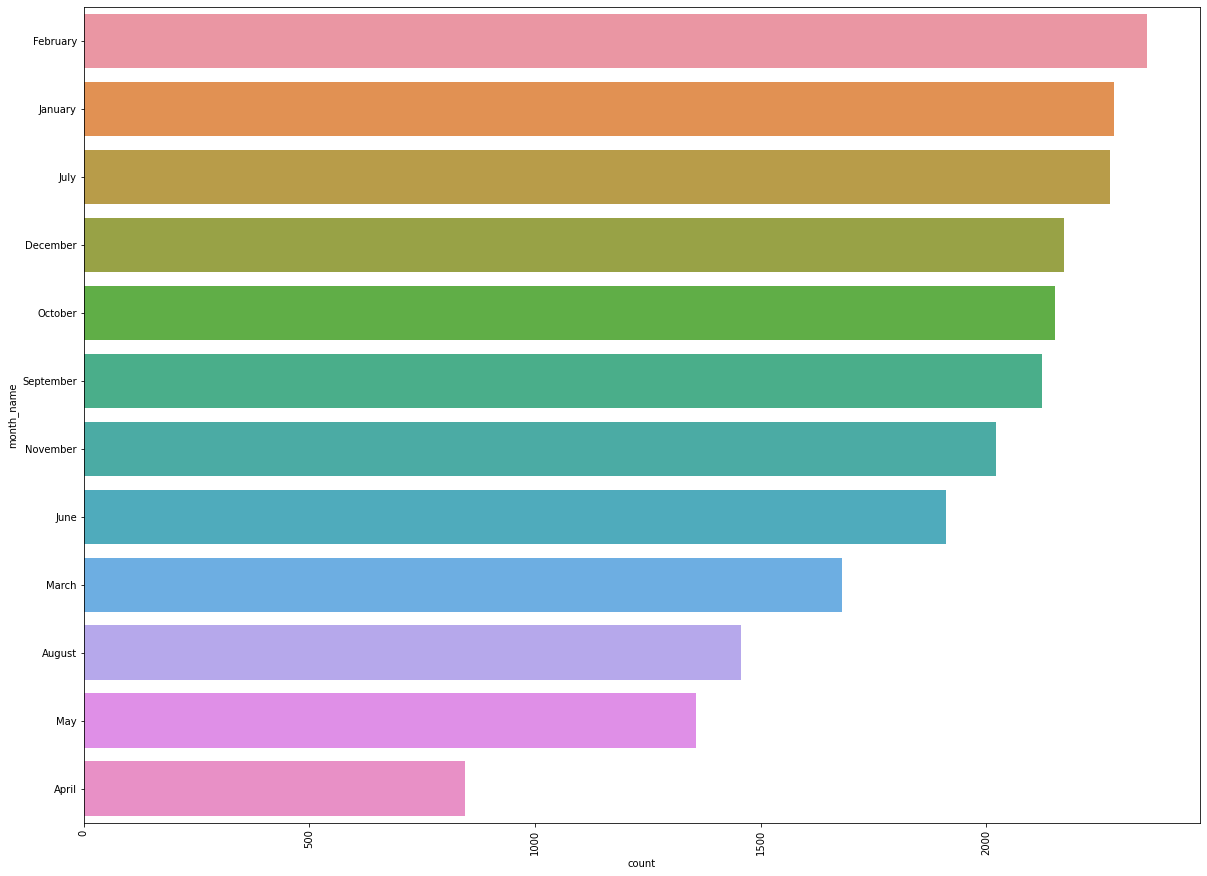

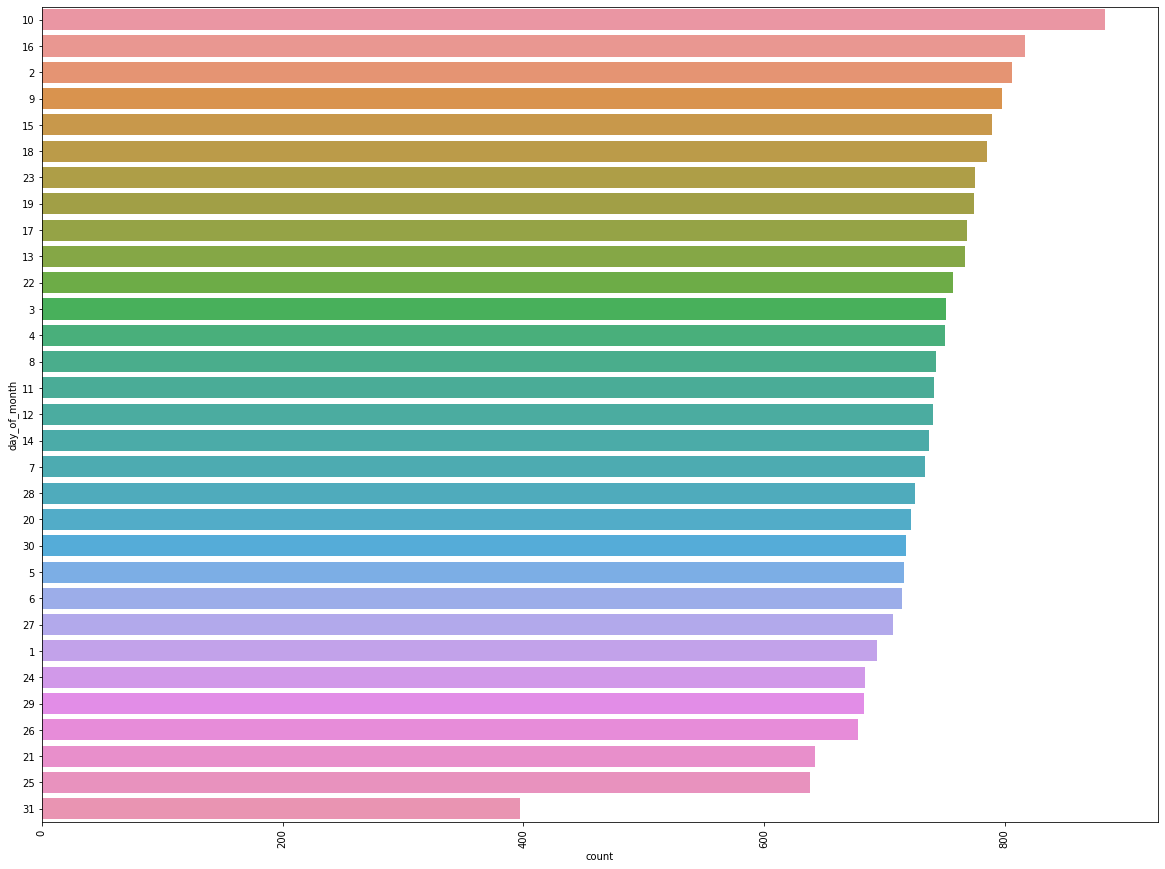

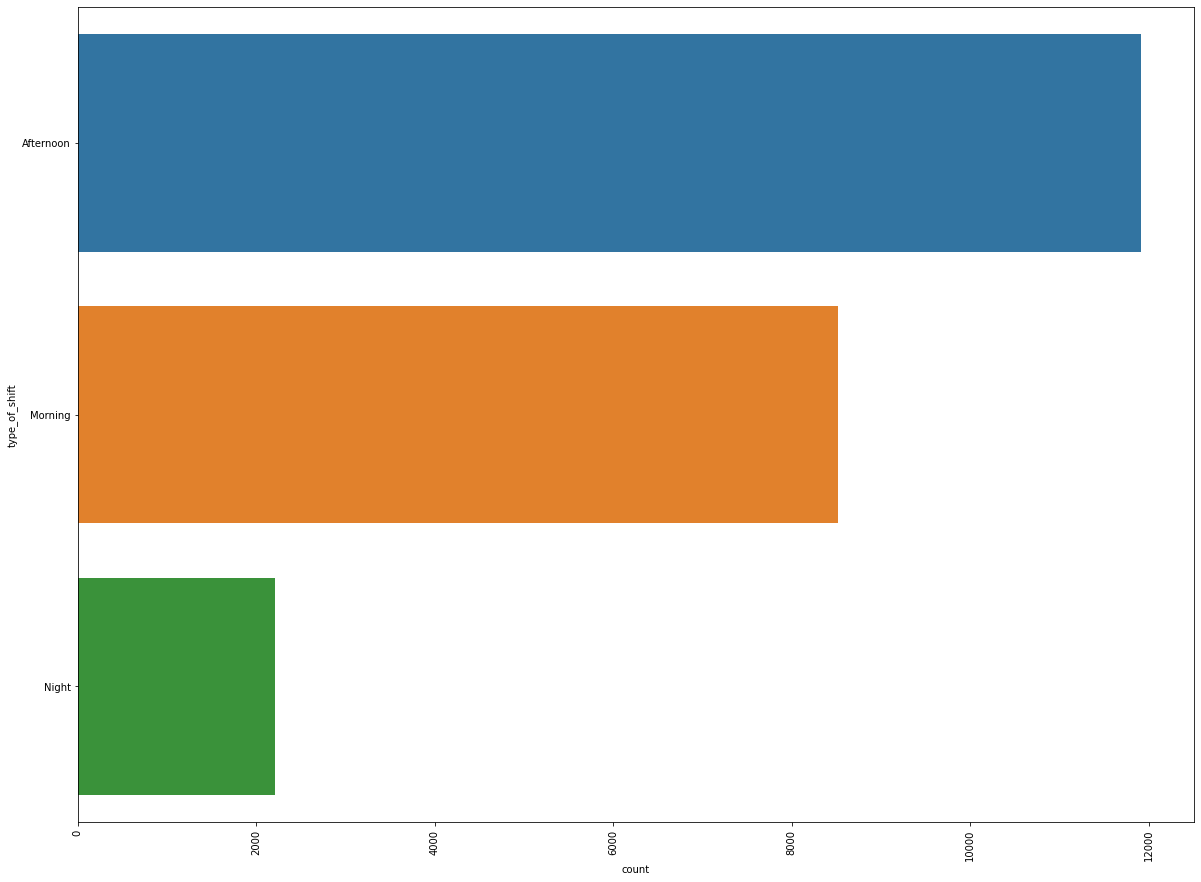

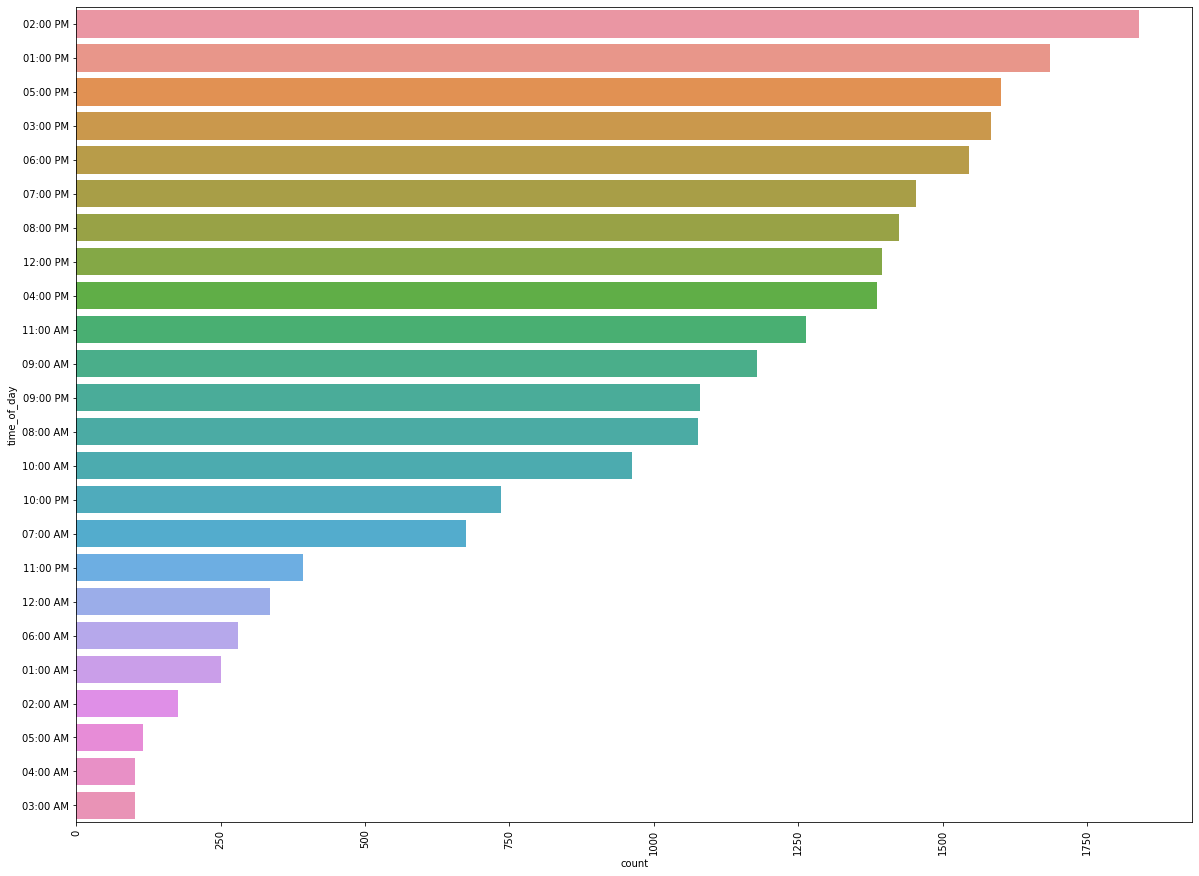

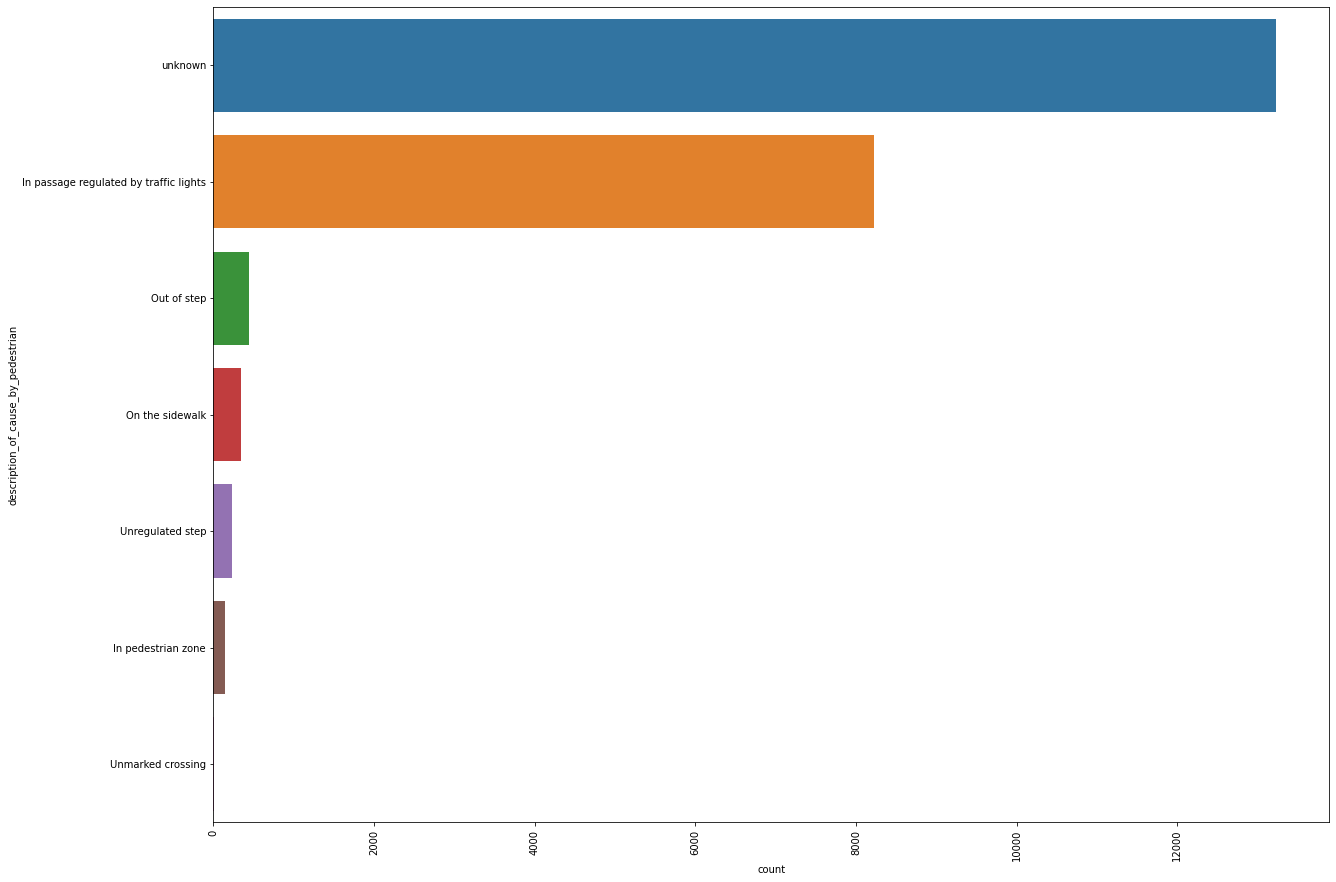

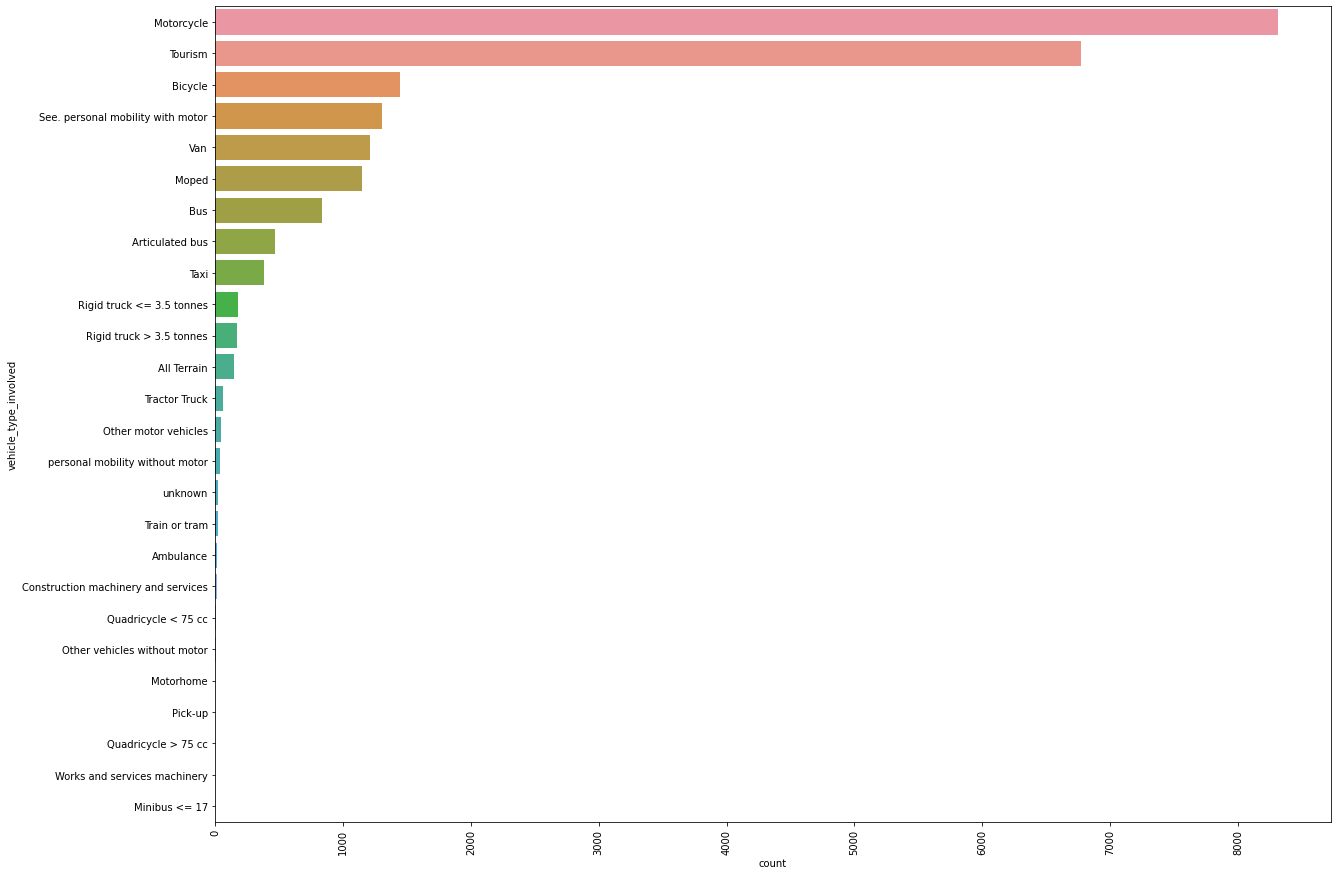

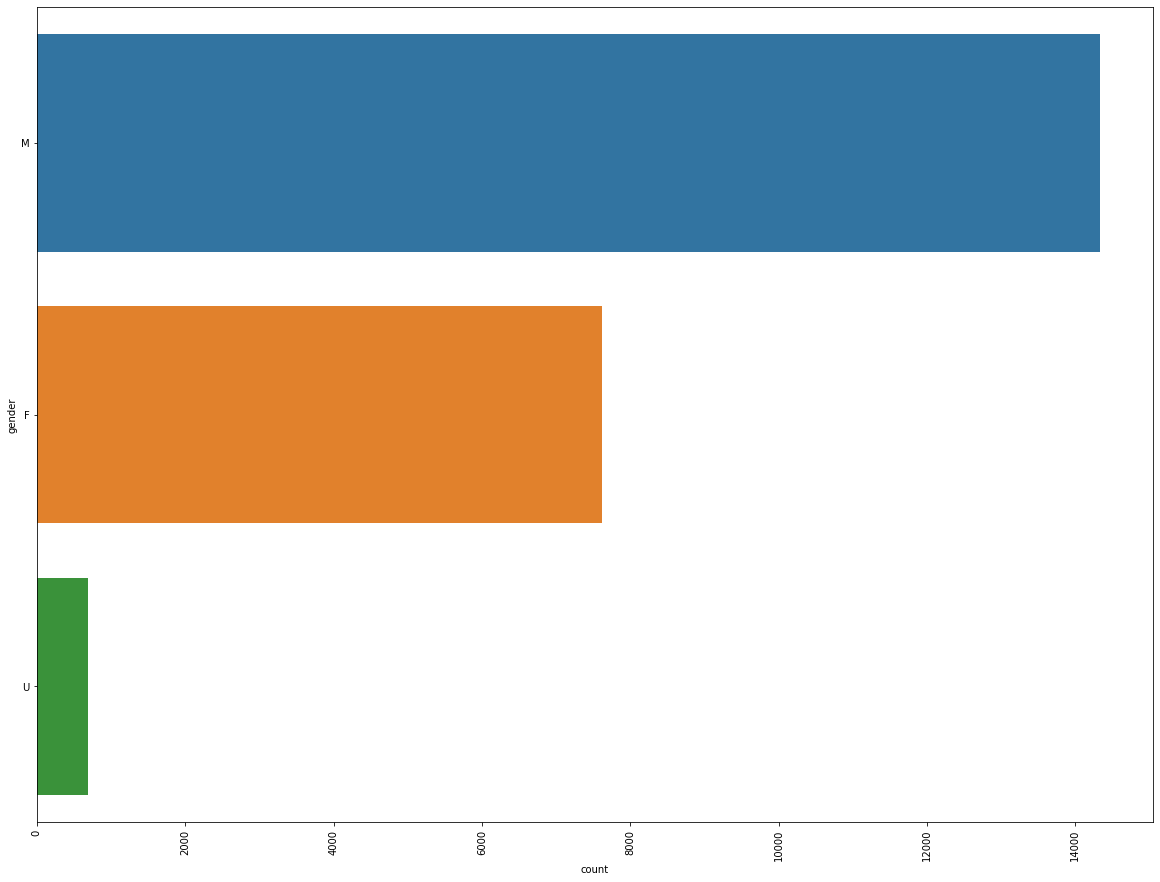

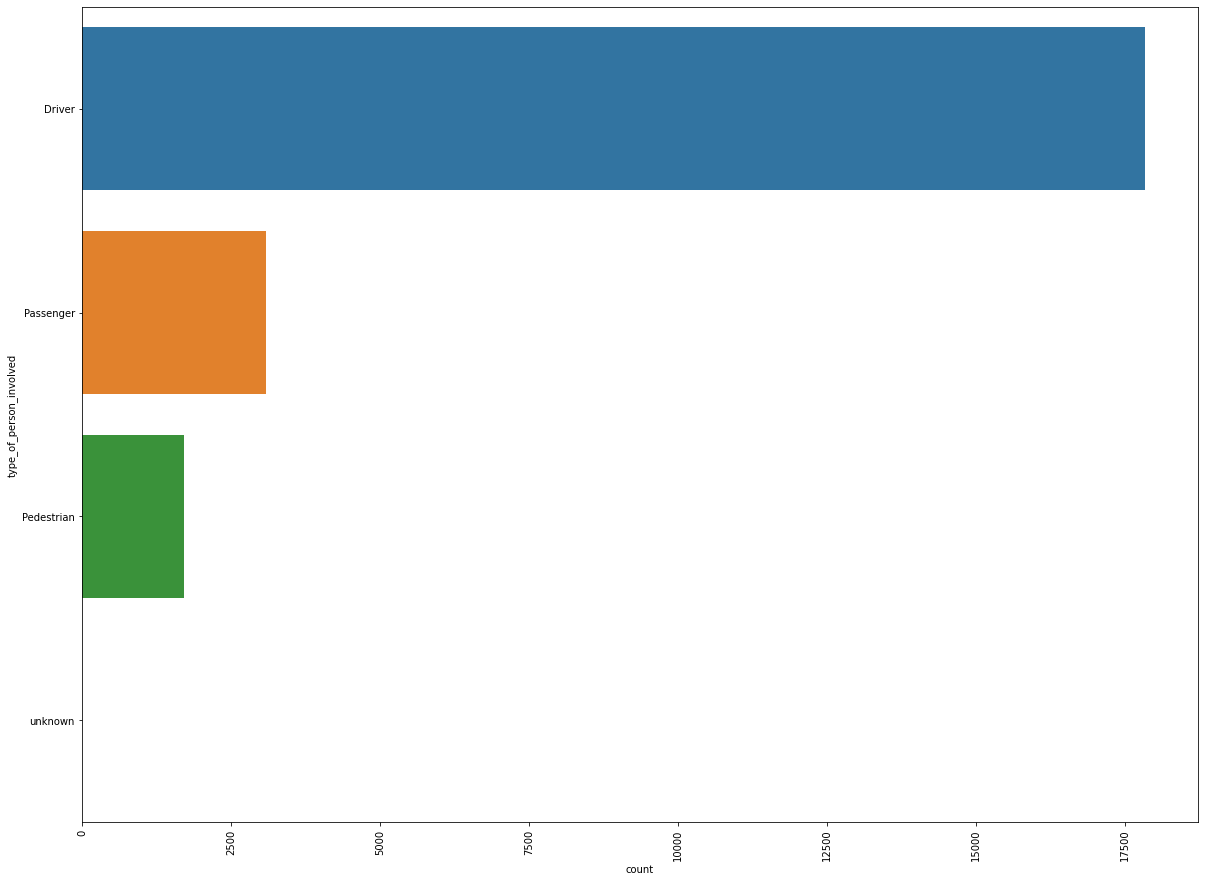

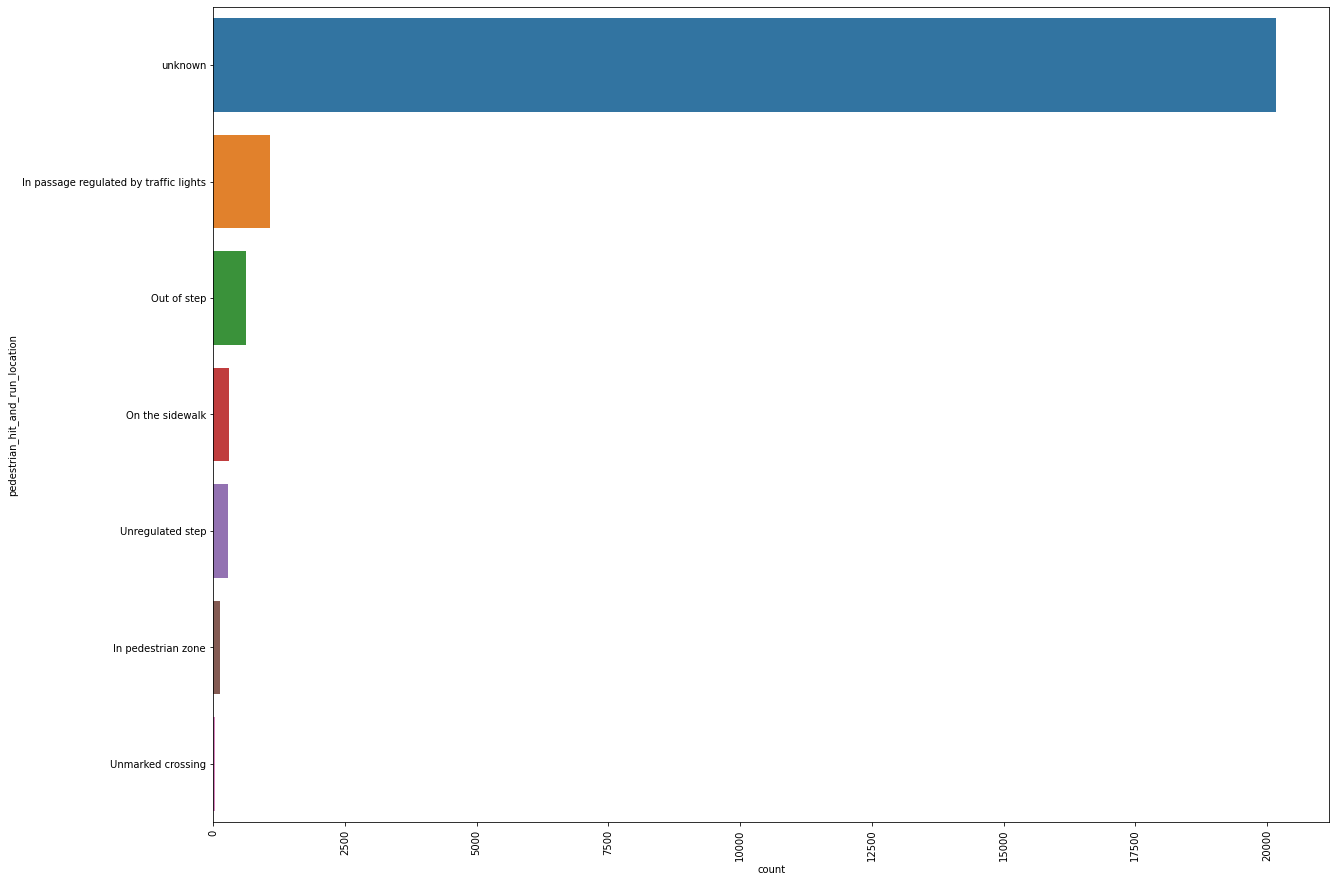

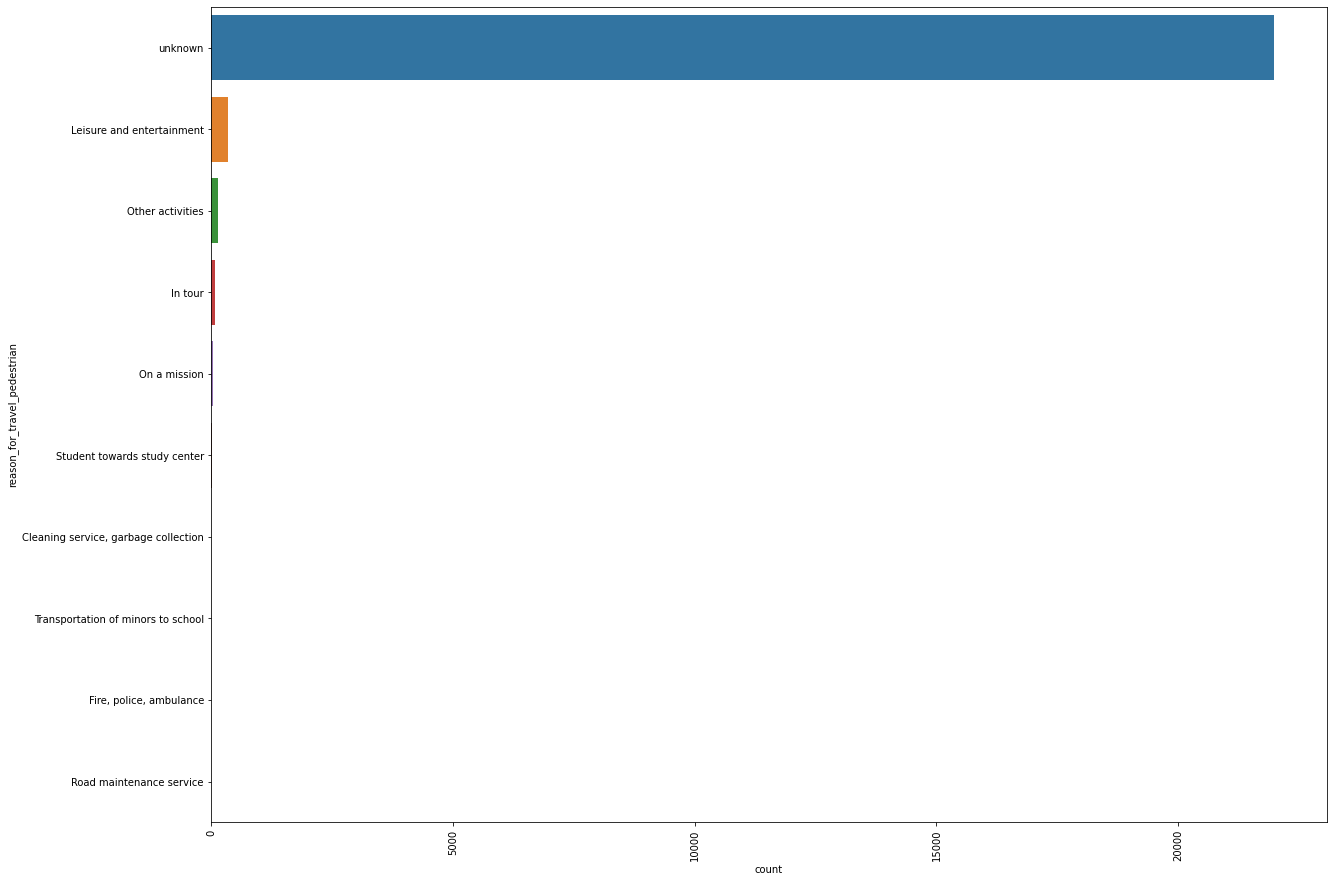

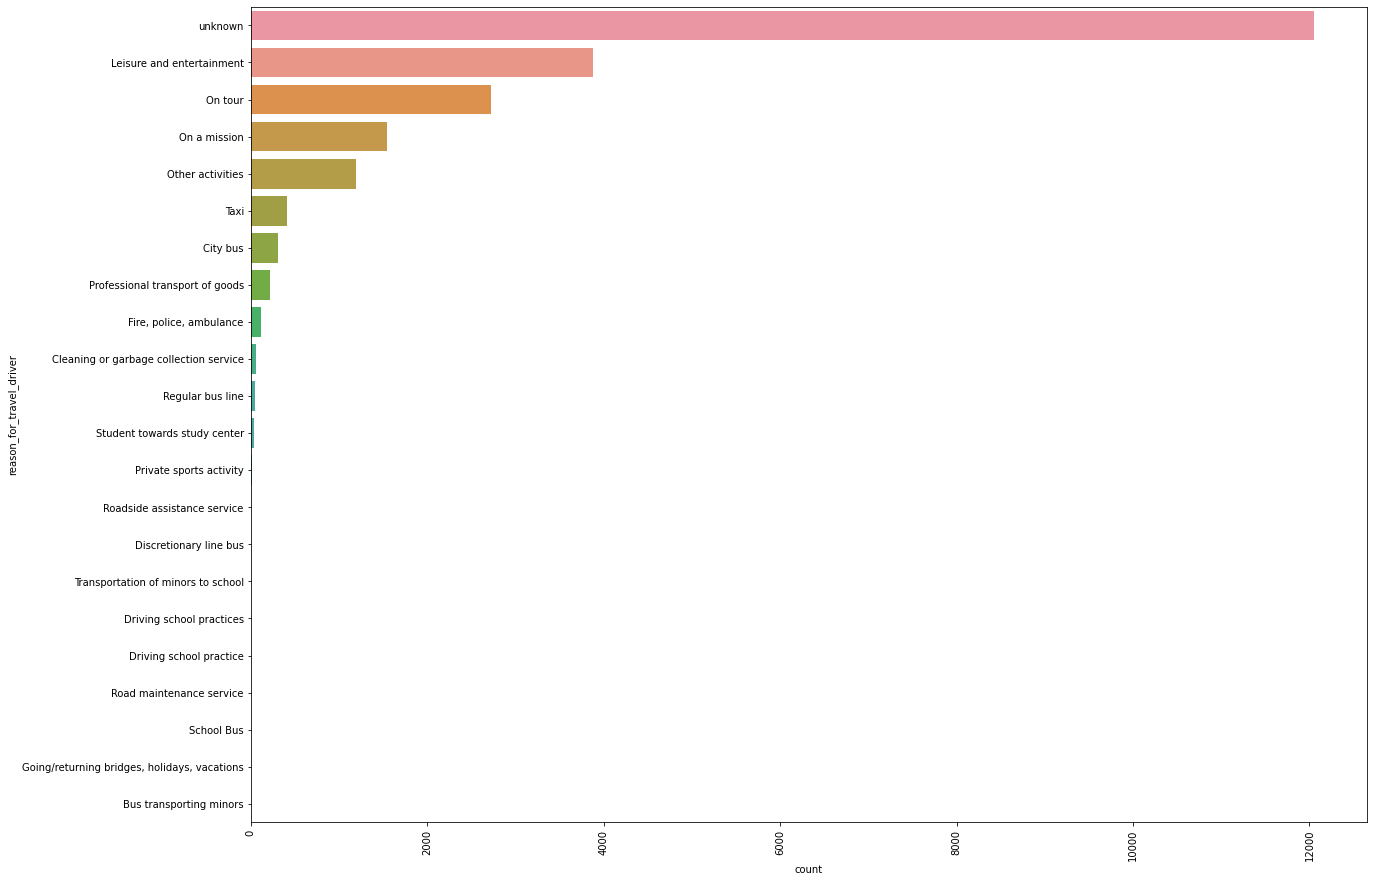

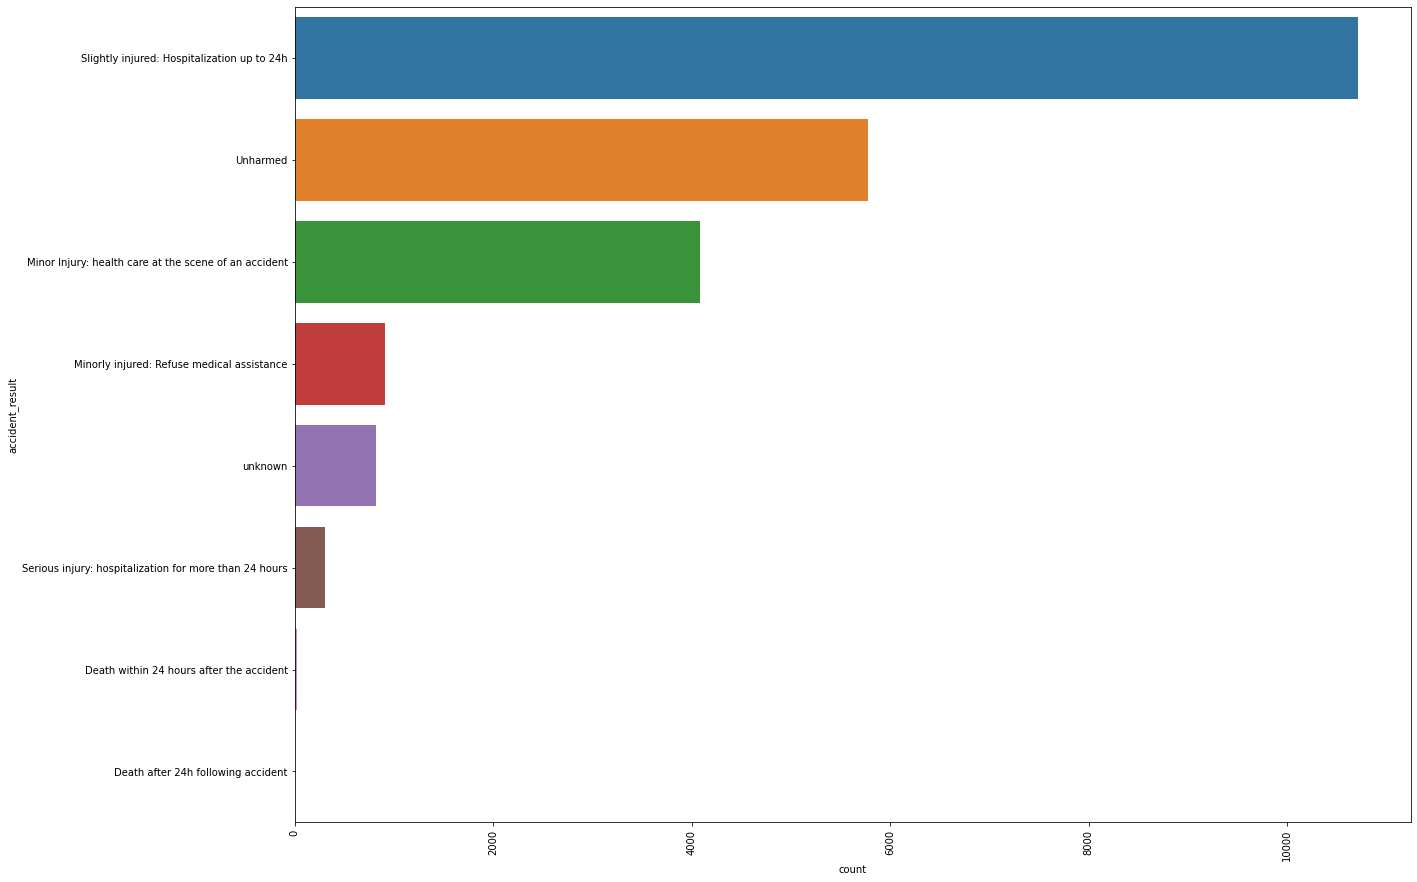

In [156]:
for col in count_plot_list:
    fig, ax = plt.subplots(figsize = (20,15))
    ax = sns.countplot(y = col, data=data,order=data[col].value_counts().index)
    ax.tick_params(axis='x', labelrotation = 90)
    plt.show()

In [157]:
# fig, ax = plt.subplots(figsize = (35,5))
# ax = sns.countplot(x = 'month_name', data=data, order=data['month_name'].value_counts().index )
# plt.show()

# Probabilty Density, male vs female

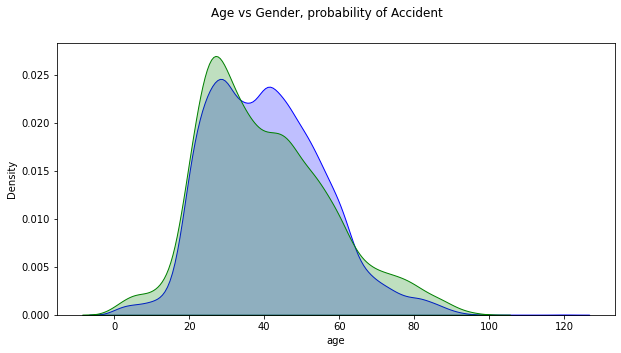

In [158]:
fig, ax = plt.subplots(figsize = (10,5))

sns.kdeplot(data[data['gender'] == 'M']['age'], shade=True, color = 'blue', label = 'M', ax = ax)
sns.kdeplot(data[data['gender'] == 'F']['age'], shade=True, color = 'green', label = 'M', ax = ax)

fig.suptitle("Age vs Gender, probability of Accident");

# Dropping the 'reason_for_travel_pedestrian' column
### 97% of the data belongs to one column, for machine learning purposes, a columns with essentially all the same values, it doesn't provide much value

In [159]:
data['reason_for_travel_pedestrian'].value_counts()/data['reason_for_travel_pedestrian'].value_counts().sum()*100

unknown                                 97.092998
Leisure and entertainment                1.581621
Other activities                         0.640601
In tour                                  0.349017
On a mission                             0.194389
Student towards study center             0.097195
Cleaning service, garbage collection     0.013254
Transportation of minors to school       0.013254
Fire, police, ambulance                  0.013254
Road maintenance service                 0.004418
Name: reason_for_travel_pedestrian, dtype: float64

In [160]:
# largest majority over 95%
data.drop(['reason_for_travel_pedestrian'], axis = 1, inplace  = True)

In [161]:
data.head(1)

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_driver,accident_result,longitude,latitude
0,1,Ciutat Vella,el Raval,68503,Tuesday,2021,April,13,Afternoon,08:00 PM,In passage regulated by traffic lights,Bicycle,F,8.0,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.167209,41.377541


# Dropping the 'pedestrian_hit_and_run_location' column?

In [162]:
data['pedestrian_hit_and_run_location'].value_counts()/data['pedestrian_hit_and_run_location'].value_counts().sum()*100

unknown                                   89.105368
In passage regulated by traffic lights     4.780208
Out of step                                2.747957
On the sidewalk                            1.360725
Unregulated step                           1.285620
In pedestrian zone                         0.561078
Unmarked crossing                          0.159046
Name: pedestrian_hit_and_run_location, dtype: float64

# Review age

In [163]:
data['age'].value_counts()[0]

28

In [164]:
data[(data['age'] == 0) & ~(data['type_of_person_involved'] == 'Passenger')] # hehe

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_driver,accident_result,longitude,latitude
3900,4,Les Corts,la Maternitat i Sant Ramon,66508,Wednesday,2021,March,3,Afternoon,06:00 PM,In passage regulated by traffic lights,Motorcycle,F,0.0,Pedestrian,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.126938,41.387764
8447,5,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,46103,Wednesday,2021,October,6,Afternoon,05:00 PM,In passage regulated by traffic lights,Tourism,F,0.0,Pedestrian,Unregulated step,unknown,Slightly injured: Hospitalization up to 24h,2.140049,41.393509
8497,9,Sant Andreu,el Congrés i els Indians,121402,Thursday,2021,April,22,Afternoon,05:00 PM,In passage regulated by traffic lights,Motorcycle,F,0.0,Pedestrian,Unregulated step,unknown,Slightly injured: Hospitalization up to 24h,2.178507,41.427016
13116,10,Sant Martí,el Poblenou,346800,Monday,2020,March,16,Afternoon,06:00 PM,unknown,Motorcycle,M,0.0,Driver,unknown,"Fire, police, ambulance",Minor Injury: health care at the scene of an a...,2.200428,41.401847
20224,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",271100,Wednesday,2020,November,4,Afternoon,03:00 PM,unknown,Bicycle,M,0.0,Driver,unknown,unknown,Unharmed,2.183817,41.389512


In [165]:
data[~(data['age'] == 0)] #hehe part 2

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_driver,accident_result,longitude,latitude
0,1,Ciutat Vella,el Raval,68503,Tuesday,2021,April,13,Afternoon,08:00 PM,In passage regulated by traffic lights,Bicycle,F,8.000000,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.167209,41.377541
1,1,Ciutat Vella,el Raval,198804,Friday,2021,March,12,Morning,12:00 PM,In passage regulated by traffic lights,Taxi,M,58.000000,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.171499,41.375062
2,1,Ciutat Vella,el Raval,250904,Monday,2021,October,11,Afternoon,07:00 PM,In passage regulated by traffic lights,See. personal mobility with motor,F,52.000000,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.169152,41.385428
3,1,Ciutat Vella,el Raval,282106,Saturday,2021,February,6,Afternoon,03:00 PM,In passage regulated by traffic lights,Bicycle,M,47.000000,Pedestrian,On the sidewalk,unknown,Minorly injured: Refuse medical assistance,2.166916,41.380600
4,1,Ciutat Vella,el Raval,701367,Sunday,2021,September,12,Afternoon,05:00 PM,In passage regulated by traffic lights,See. personal mobility with motor,M,4.000000,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.170672,41.377988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,1,Ciutat Vella,el Barri Gňtic,701266,Thursday,2020,December,31,Morning,01:00 PM,unknown,Motorcycle,M,48.000000,Driver,unknown,Other activities,Slightly injured: Hospitalization up to 24h,2.178636,41.376447
22660,1,Ciutat Vella,el Barri Gňtic,701266,Thursday,2020,December,31,Morning,01:00 PM,unknown,See. personal mobility with motor,M,16.000000,Driver,unknown,Other activities,Slightly injured: Hospitalization up to 24h,2.178636,41.376447
22661,2,Eixample,la Nova Esquerra de l'Eixample,18505,Thursday,2020,December,31,Afternoon,09:00 PM,unknown,Motorcycle,F,56.000000,Passenger,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.154051,41.384166
22662,2,Eixample,la Nova Esquerra de l'Eixample,18505,Thursday,2020,December,31,Afternoon,09:00 PM,unknown,Motorcycle,M,64.000000,Driver,unknown,unknown,Slightly injured: Hospitalization up to 24h,2.154051,41.384166


In [166]:
data.shape

(22635, 20)

# Chi Square Analysis

In [167]:
list(data.select_dtypes(object).columns)

['district_code',
 'district_name',
 'neighborhood_name',
 'street_code',
 'day_of_week',
 'year',
 'month_name',
 'day_of_month',
 'type_of_shift',
 'time_of_day',
 'description_of_cause_by_pedestrian',
 'vehicle_type_involved',
 'gender',
 'type_of_person_involved',
 'pedestrian_hit_and_run_location',
 'reason_for_travel_driver',
 'accident_result']

In [168]:
for i in list(data.select_dtypes(object).columns):
    for j in list(data.select_dtypes(object).columns):
        if i == j:
            break
        if chi2_contingency(pd.crosstab(data[i],data[j]))[1] < .05: 
            print(i + ' and ' + j + ' ' + str(chi2_contingency(pd.crosstab(data[i],data[j]))[1]))

district_name and district_code 0.0
neighborhood_name and district_code 0.0
neighborhood_name and district_name 0.0
street_code and district_code 0.0
street_code and district_name 0.0
street_code and neighborhood_name 0.0
day_of_week and district_code 2.5538346574985315e-09
day_of_week and district_name 1.3075210492821493e-11
day_of_week and neighborhood_name 7.728941174713091e-72
day_of_week and street_code 0.0
year and district_code 0.0025087466470449147
year and district_name 0.0
year and neighborhood_name 2.5482650983233166e-305
year and street_code 1.5653774910498593e-66
year and day_of_week 0.0040390319484758545
month_name and district_code 3.731388001072649e-22
month_name and district_name 3.14907632591835e-82
month_name and neighborhood_name 4.9228169169513e-96
month_name and street_code 0.0
month_name and day_of_week 1.583184472149061e-64
month_name and year 1.7218280083432843e-222
day_of_month and district_code 2.6133165766667957e-23
day_of_month and district_name 2.899594067

# Train Test Split and Data Preprocessing

In [169]:
data.select_dtypes(object).nunique()

district_code                           11
district_name                           14
neighborhood_name                       79
street_code                           1343
day_of_week                              7
year                                     2
month_name                              12
day_of_month                            31
type_of_shift                            3
time_of_day                             24
description_of_cause_by_pedestrian       7
vehicle_type_involved                   26
gender                                   3
type_of_person_involved                  4
pedestrian_hit_and_run_location          7
reason_for_travel_driver                22
accident_result                          8
dtype: int64

In [170]:
data.select_dtypes('number').nunique()

age           100
longitude    9355
latitude     7963
dtype: int64

# Testing for smote viability

In [171]:
data_smote = data[~(data['accident_result'] == 'Death after 24h following accident') & ~(data['accident_result'] == 'unknown')].reset_index(drop=True)

In [172]:
data_smote.head(1) # just using this to keep track of all the data ive lost

,district_code,district_name,neighborhood_name,street_code,day_of_week,year,month_name,day_of_month,type_of_shift,time_of_day,description_of_cause_by_pedestrian,vehicle_type_involved,gender,age,type_of_person_involved,pedestrian_hit_and_run_location,reason_for_travel_driver,accident_result,longitude,latitude
0,1,Ciutat Vella,el Raval,68503,Tuesday,2021,April,13,Afternoon,08:00 PM,In passage regulated by traffic lights,Bicycle,F,8.0,Pedestrian,On the sidewalk,unknown,Slightly injured: Hospitalization up to 24h,2.167209,41.377541


In [173]:
rows_lost_after_target_drop = data.shape[0] - data_smote.shape[0]

In [174]:
total_columns_dropped.append(rows_lost_after_target_drop)

In [175]:
data = data[~(data['accident_result'] == 'Death after 24h following accident') & ~(data['accident_result'] == 'unknown')].reset_index(drop=True)

In [176]:
# scale numerical data

In [177]:
# Y = data_smote['accident_result']
# data_smote.drop(['accident_result'], axis = 1, inplace = True)

# Y.shape

# # numerical data
# numerical = data_smote.select_dtypes('number')
# # categorical data
# categorical = data_smote.select_dtypes(object)



# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop = 'first').fit(categorical)
# encoded_categoricals = encoder.transform(categorical).toarray()
# encoded_categoricals = pd.DataFrame(encoded_categoricals)

# encoded_categoricals.shape

# normalized_X = Normalizer().fit_transform(numerical)

# feature_space = pd.concat([pd.DataFrame(normalized_X),encoded_categoricals], axis = 1)

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_sm, y_sm = smote.fit_resample(feature_space, Y)
# y_sm.value_counts()

# Exporting CSV

In [178]:
# data.to_csv('tableu_data_spain.csv')

In [179]:
# Separate our Target

In [180]:
Y = data['accident_result']
data.drop(['accident_result'], axis = 1, inplace = True)

In [181]:
# numerical data
numerical = data.select_dtypes('number')
# categorical data
categorical = data.select_dtypes(object)

# Lets use one hot encoding to process our categorical data:

In [182]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first').fit(categorical)
encoded_categoricals = encoder.transform(categorical).toarray()
encoded_categoricals = pd.DataFrame(encoded_categoricals)

In [183]:
encoded_categoricals.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# Verifying our 1579 columns

In [184]:
# We can verify that the amount of columns produced matches with the amount of unique categoricals
# we have 16 less, because we called drop = 'first', thus it makes sense that we have this count
# if we didn't use drop, we would have 1595 encoded columns
(data.select_dtypes(object).nunique().sum())-(data.select_dtypes(object).nunique().count())

1555

# Logistic Regression Model Phase 1

In [185]:
#importing pre-processors


In [186]:
# function to get us 4 different transformed data values
def dragon(num_data):
    normalized_X = Normalizer().fit_transform(num_data)
    standardscale_X = StandardScaler().fit_transform(num_data)
    min_max_scale_X = MinMaxScaler().fit_transform(num_data)
    max_abs_X = MaxAbsScaler().fit_transform(num_data)
    return normalized_X,standardscale_X,min_max_scale_X,max_abs_X

In [187]:
# unpack
norm_X,stand_X,MM_X,Max_abs_X = dragon(numerical)

In [188]:
# Make a list of the various forms of scaled data
transform_list = [norm_X,stand_X,MM_X,Max_abs_X]

# Decision Tree Implementation

In [189]:
# Lets create a dataframe where we have not scaled our categoricals, but encoded our categoricals

# a dataframe with unscaled numericals
numerical.head(1)
# a dataframe with encoded categoricals
encoded_categoricals.shape
# Lets take a quick look at our Y
Y.head()

0    Slightly injured: Hospitalization up to 24h
1    Slightly injured: Hospitalization up to 24h
2    Slightly injured: Hospitalization up to 24h
3     Minorly injured: Refuse medical assistance
4    Slightly injured: Hospitalization up to 24h
Name: accident_result, dtype: object

In [190]:
numerical.reset_index(drop=True)

,age,longitude,latitude
0,8.000000,2.167209,41.377541
1,58.000000,2.171499,41.375062
2,52.000000,2.169152,41.385428
3,47.000000,2.166916,41.380600
4,4.000000,2.170672,41.377988
...,...,...,...
21809,48.000000,2.178636,41.376447
21810,16.000000,2.178636,41.376447
21811,56.000000,2.154051,41.384166
21812,64.000000,2.154051,41.384166


In [191]:
encoded_categoricals.reset_index(drop=True)

0     1     2     3     4     5     6     7     8     9     10    11    \
0       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
21809   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21810   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21811   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
21812   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
21813   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

       12    13    14    15    16    17    18    19    20    21    22    23    \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
21809   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21810   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21812   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21813   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       24    25    26    27    28    29    30    31    32    33    34    35    \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
21809   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21810   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21812   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21813   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       36    37    38    39    40    41    42    43    44    45    46    47    \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
21809   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21810   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21811   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21812   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
21813   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       48    49    50    51    52    53    54    55    56    57    58    59    \
0       0.0   0.0   0.0   0.0   0.

In [192]:
#Lets combine our features in a dataframe for our decision tree
#had to reset the features for some reason
dt_features = pd.concat([numerical.reset_index(drop=True),encoded_categoricals.reset_index(drop=True)], axis = 1)

In [193]:
str_list_dt = [str(i) for i in list(dt_features.columns)]

In [194]:
dt_features.columns = str_list_dt

# Using Cross Validation

# Random Forest Implementation

In [195]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=100)

In [196]:
#  oversampling suing smote and train_test_split 
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(dt_features, Y)
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size = .20)

In [197]:
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.8955189046211296

# Using Cross Validation for our random forest model

In [198]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

In [199]:
#  oversampling suing smote and train_test_split 
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(dt_features, Y)

In [200]:
forest_scores = []
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size = .20)
    forest.fit(X_train,y_train)
    forest_scores.append(forest.score(X_test,y_test))
np.mean(forest_scores)    

0.8953944297494942